In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

from datetime import datetime, date, time

import gc
import copy

import pyarrow.parquet as pq
import pyarrow as pa

In [2]:
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, KFold

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore")

import pytorch_lightning as pl
random_seed=1234
pl.seed_everything(random_seed)

Global seed set to 1234


1234

In [4]:

id_feats = ['customer_ID']
#date_col =  'S_2'
target_col = 'target'

x_cols = ['B_10__last', 'B_10__mean', 'B_11__last', 'B_11__last2max', 'B_11__last__log', 'B_11__mean', 'B_11__mean__log', 'B_11__min', 'B_12__last', 'B_12__last__log', 'B_13__last', 'B_13__last__log', 'B_14__last', 'B_14__last2max', 'B_14__min', 'B_15__last', 'B_15__mean', 'B_16__last', 'B_16__max', 'B_16__min', 'B_17__last', 'B_17__max', 'B_17__mean', 'B_17__mean2std', 'B_17__min', 'B_18__last', 'B_18__last__log', 'B_18__mean', 'B_18__mean__log', 'B_18__min', 'B_19__last', 'B_19__last__log', 'B_19__min', 'B_1__last', 'B_1__last2max', 'B_1__max', 'B_1__mean', 'B_1__min', 'B_20__last', 'B_20__last__log', 'B_20__max', 'B_20__mean', 'B_20__mean__log', 'B_20__min', 'B_21__last', 'B_21__last__log', 'B_21__max', 'B_21__mean__log', 'B_22__last', 'B_22__last__log', 'B_22__max', 'B_22__mean', 'B_22__mean__log', 'B_22__min', 'B_23__last', 'B_23__last__log', 'B_23__mean', 'B_23__min', 'B_24__last', 'B_24__last__log', 'B_24__mean', 'B_24__mean__log', 'B_25__last', 'B_25__last2max', 'B_25__min', 'B_26__last', 'B_26__last__log', 'B_26__mean__log', 'B_27__last', 'B_27__last__log', 'B_28__last', 'B_29__last', 'B_29__last__log', 'B_2__last', 'B_2__last2max', 'B_2__last__log', 'B_2__mean', 'B_2__mean__log', 'B_2__min', 'B_30=0.0', 'B_30=1.0', 'B_30=2.0', 'B_30__last', 'B_30__nunique', 'B_31__last', 'B_31__nunique', 'B_32__last', 'B_32__last__log', 'B_32__max', 'B_33__last', 'B_33__last2max', 'B_33__last__log', 'B_33__max', 'B_33__mean', 'B_33__mean__log', 'B_33__min', 'B_36__last', 'B_36__last__log', 'B_37__last', 'B_37__last2max', 'B_37__max', 'B_37__mean', 'B_38=4.0', 'B_38=5.0', 'B_38=6.0', 'B_38=7.0', 'B_38__last', 'B_38__nunique', 'B_39__last', 'B_3__last', 'B_3__last__log', 'B_3__max', 'B_3__mean', 'B_3__mean__log', 'B_3__min', 'B_3__std', 'B_40__last', 'B_40__last__log', 'B_40__mean__log', 'B_40__min', 'B_41__last', 'B_41__last__log', 'B_42__last', 'B_42__last__log', 'B_4__last', 'B_4__last2max', 'B_4__last__log', 'B_4__max', 'B_4__mean2std', 'B_4__mean__log', 'B_5__last', 'B_5__last__log', 'B_5__mean', 'B_6__last', 'B_6__min', 'B_7__last', 'B_7__max', 'B_7__mean', 'B_7__min', 'B_8__last', 'B_8__last__log', 'B_8__max', 'B_8__mean', 'B_8__mean__log', 'B_8__min', 'B_9__last', 'B_9__last2max', 'B_9__last__log', 'B_9__max', 'B_9__mean', 'B_9__mean__log', 'B_9__min', 'D_102__last', 'D_102__last__log', 'D_102__max', 'D_103__last', 'D_104__last', 'D_105__last', 'D_105__max', 'D_106__last', 'D_106__last__log', 'D_107__last', 'D_107__last__log', 'D_107__max', 'D_107__mean__log', 'D_108__last', 'D_108__last__log', 'D_109__last', 'D_109__last__log', 'D_109__mean', 'D_110__last', 'D_111__last', 'D_112__last', 'D_112__last__log', 'D_113__last', 'D_113__last__log', 'D_113__max', 'D_114=0.0', 'D_114__last', 'D_114__nunique', 'D_115__last', 'D_115__last__log', 'D_116__last', 'D_117__last', 'D_118__last', 'D_118__last__log', 'D_118__mean__log', 'D_119__last', 'D_119__last__log', 'D_120=1.0', 'D_120__last', 'D_120__nunique', 'D_121__last', 'D_122__last', 'D_122__max', 'D_122__min', 'D_123__last', 'D_123__last__log', 'D_123__mean', 'D_124__last', 'D_125__last', 'D_125__last__log', 'D_126__last', 'D_127__last', 'D_128__last', 'D_128__max', 'D_128__min', 'D_129__last', 'D_129__max', 'D_129__mean', 'D_130__last', 'D_130__max', 'D_131__last', 'D_131__last__log', 'D_131__max', 'D_131__min', 'D_132__last', 'D_132__mean2std', 'D_132__min', 'D_133__last', 'D_133__last__log', 'D_133__max', 'D_133__min', 'D_134__last', 'D_134__min', 'D_135__last', 'D_135__last__log', 'D_135__mean2std', 'D_136__last', 'D_136__last__log', 'D_137__last', 'D_137__last__log', 'D_138__last', 'D_138__last__log', 'D_139__last', 'D_139__mean', 'D_140__last', 'D_140__last__log', 'D_140__max', 'D_141__last', 'D_142__last', 'D_143__last', 'D_144__last', 'D_145__last', 'D_39__last', 'D_39__last__log', 'D_39__max', 'D_39__mean', 'D_39__range', 'D_39__std', 'D_41__last', 'D_41__last__log', 'D_41__max', 'D_41__mean', 'D_41__min', 'D_42__first', 'D_42__last', 'D_42__max', 'D_42__mean', 'D_42__mean2std', 'D_42__min', 'D_43__last', 'D_43__last__log', 'D_43__max', 'D_43__mean', 'D_43__mean__log', 'D_43__min', 'D_44__last', 'D_44__last2max', 'D_44__last__log', 'D_44__max', 'D_44__mean', 'D_44__mean__log', 'D_44__min', 'D_44__range', 'D_44__std', 'D_45__first', 'D_45__last', 'D_45__last__log', 'D_45__max', 'D_45__mean', 'D_45__mean__log', 'D_45__min', 'D_46__last', 'D_46__mean', 'D_46__mean2std', 'D_46__min', 'D_47__last', 'D_48__first', 'D_48__last', 'D_48__max', 'D_48__mean', 'D_48__min', 'D_49__last', 'D_49__last__log', 'D_49__mean2std', 'D_50__last', 'D_51__last', 'D_51__last__log', 'D_51__mean', 'D_52__last', 'D_52__max', 'D_52__mean', 'D_52__mean2std', 'D_52__min', 'D_53__last', 'D_53__last__log', 'D_53__max', 'D_53__mean2std', 'D_53__min', 'D_54__last', 'D_55__last', 'D_55__last__log', 'D_55__max', 'D_55__min', 'D_56__last', 'D_56__min', 'D_58__last', 'D_58__min', 'D_59__last', 'D_59__max', 'D_60__last', 'D_60__last__log', 'D_60__max', 'D_61__last', 'D_61__max', 'D_61__mean', 'D_61__min', 'D_62__last', 'D_62__max', 'D_62__mean', 'D_62__min', 'D_64=U', 'D_65__last', 'D_65__last__log', 'D_65__max', 'D_65__mean', 'D_65__mean__log', 'D_68=1.0', 'D_68__last', 'D_69__last', 'D_69__min', 'D_70__last', 'D_70__max', 'D_70__mean2std', 'D_70__min', 'D_71__last', 'D_72__last', 'D_72__max', 'D_72__min', 'D_73__last', 'D_74__last', 'D_74__max', 'D_74__mean', 'D_75__last', 'D_75__last__log', 'D_75__max', 'D_75__mean', 'D_75__mean__log', 'D_76__last', 'D_77__last', 'D_77__max', 'D_77__mean', 'D_77__min', 'D_78__last', 'D_78__max', 'D_78__mean', 'D_78__mean__log', 'D_79__last', 'D_79__max', 'D_80__last', 'D_81__last', 'D_81__max', 'D_81__mean', 'D_82__last', 'D_83__last', 'D_84__last', 'D_84__max', 'D_84__mean', 'D_86__last', 'D_87__last', 'D_88__last', 'D_89__last', 'D_89__max', 'D_89__mean', 'D_91__last', 'D_92__last', 'D_93__last', 'D_94__last', 'D_96__last', 'P_2__first', 'P_2__last', 'P_2__last2max', 'P_2__max', 'P_2__mean', 'P_2__min', 'P_3__last', 'P_3__max', 'P_3__mean', 'P_3__min', 'P_4__last', 'P_4__max', 'P_4__mean', 'P_4__min', 'R_10__last', 'R_10__max', 'R_10__mean', 'R_10__mean__log', 'R_10__std', 'R_11__last', 'R_11__max', 'R_11__mean', 'R_12__last', 'R_12__max', 'R_12__mean', 'R_13__last', 'R_13__max', 'R_13__mean', 'R_13__mean2std', 'R_14__last', 'R_15__last', 'R_15__max', 'R_15__mean', 'R_16__last', 'R_16__max', 'R_16__mean', 'R_16__mean__log', 'R_17__last', 'R_17__max', 'R_18__last', 'R_18__max', 'R_19__last', 'R_19__min', 'R_1__last', 'R_1__last__log', 'R_1__max', 'R_1__mean', 'R_1__mean__log', 'R_1__min', 'R_1__range', 'R_1__std', 'R_20__last', 'R_20__max', 'R_20__mean', 'R_21__last', 'R_22__last', 'R_22__max', 'R_23__last', 'R_24__last', 'R_24__max', 'R_24__mean', 'R_25__last', 'R_25__max', 'R_26__last', 'R_26__mean2std', 'R_27__last', 'R_27__max', 'R_27__mean', 'R_27__min', 'R_28__last', 'R_28__last__log', 'R_2__last', 'R_2__last__log', 'R_2__max', 'R_2__mean', 'R_2__mean__log', 'R_2__min', 'R_2__range', 'R_2__std', 'R_3__last', 'R_3__last__log', 'R_3__max', 'R_3__mean', 'R_3__mean__log', 'R_3__min', 'R_4__last', 'R_4__max', 'R_4__mean', 'R_4__mean__log', 'R_4__min', 'R_5__last', 'R_5__max', 'R_5__mean', 'R_5__mean__log', 'R_5__range', 'R_6__last', 'R_6__last__log', 'R_6__max', 'R_6__mean', 'R_6__mean__log', 'R_7__last', 'R_7__max', 'R_7__mean', 'R_7__range', 'R_8__last', 'R_8__max', 'R_8__mean', 'R_8__mean__log', 'R_9__last', 'R_9__mean2std', 'S_11__last', 'S_11__mean', 'S_12__last', 'S_12__max', 'S_13__last', 'S_15__last', 'S_15__max', 'S_15__mean', 'S_16__last', 'S_17__last', 'S_17__min', 'S_18__last', 'S_19__last', 'S_20__last', 'S_20__max', 'S_22__last', 'S_22__max', 'S_22__mean', 'S_23__last', 'S_23__max', 'S_23__mean', 'S_24__last', 'S_25__last', 'S_25__last2max', 'S_25__mean', 'S_25__min', 'S_25__range', 'S_25__std', 'S_26__last', 'S_26__last__log', 'S_27__last', 'S_27__mean2std', 'S_3__last', 'S_3__max', 'S_3__mean', 'S_3__min', 'S_5__last', 'S_5__last__log', 'S_5__mean__log', 'S_6__last', 'S_6__max', 'S_6__min', 'S_7__last', 'S_7__max', 'S_7__mean', 'S_7__min', 'S_8__last', 'S_8__mean', 'S_8__min', 'S_9__last', 'S_9__max']

x_cols = ['S_3__range', 'R_27__mean', 'B_11__std', 'D_87__last', 'R_13__range', 'D_61__mean', 'B_41__last', 'R_17__std', 'D_118__last__log', 'B_4__range', 'B_8__last2max', 'S_25__min', 'D_52__mean', 'B_20__first', 'B_4__mean2std', 'D_145__last', 'B_4__last__log', 'D_102__last', 'D_110__last', 'B_32__range', 'R_7__mean__log', 'R_21__range', 'R_16__mean__log', 'D_112__mean__log', 'S_26__last__log', 'S_27__last', 'B_24__range', 'D_74__last__log', 'D_120=0.0', 'B_38__nunique', 'B_19__mean', 'B_23__first', 'B_11__min', 'D_118__mean__log', 'S_22__first', 'D_47__max', 'B_38=2.0', 'B_38=5.0', 'D_41__mean', 'D_94__last', 'B_9__min', 'B_42__last', 'D_122__mean', 'B_22__mean', 'R_7__max', 'R_27__first', 'D_44__max', 'D_79__mean__log', 'R_1__max', 'B_10__min', 'D_139__last', 'D_44__last', 'D_58__mean', 'D_48__mean', 'R_26__last', 'B_7__range', 'S_15__range', 'D_127__max', 'S_13__min', 'B_2__last2max', 'D_47__min', 'D_89__last', 'S_11__last', 'R_3__last__log', 'B_16__first', 'B_12__last', 'B_1__last', 'B_33__mean', 'D_51__range', 'D_62__range', 'B_3__last__log', 'R_4__min', 'D_81__last__log', 'B_11__first', 'S_5__last__log', 'D_43__last__log', 'B_4__mean', 'D_135__last', 'B_4__first', 'D_81__mean', 'R_16__last', 'B_22__range', 'D_119__last', 'B_25__last', 'S_23__std', 'B_29__last', 'R_16__max', 'D_70__last__log', 'D_41__max', 'D_74__max', 'D_79__mean', 'D_44__first', 'B_9__range', 'D_78__range', 'B_16__mean', 'B_2__last__log', 'B_9__first', 'D_122__last', 'D_47__last', 'D_42__std', 'D_43__last', 'S_8__last2max', 'B_24__max', 'D_84__last', 'B_5__mean__log', 'D_107__mean__log', 'D_78__max', 'B_8__last__log', 'D_77__last', 'D_58__range', 'D_82__last', 'B_11__max', 'D_51__first', 'B_1__last2max', 'B_11__last2max', 'D_74__std', 'S_20__std', 'B_3__last2max', 'B_14__mean', 'P_2__last2max', 'D_58__min', 'D_64=O', 'P_2__mean', 'D_131__first', 'D_65__last__log', 'S_24__last', 'R_1__last', 'P_4__mean', 'D_77__mean__log', 'D_44__last2max', 'R_25__max', 'B_2__last', 'D_74__min', 'D_81__last', 'D_43__mean', 'D_70__range', 'D_53__min', 'D_136__last', 'B_23__min', 'D_70__max', 'R_28__last__log', 'B_19__last__log', 'D_129__mean', 'B_40__min', 'D_58__first', 'D_55__std', 'D_135__mean2std', 'D_43__min', 'S_11__std', 'P_2__max', 'D_119__first', 'D_131__range', 'D_62__max', 'R_4__std', 'R_24__mean', 'D_114=999.0', 'D_81__std', 'B_1__range', 'S_6__std', 'B_6__min', 'R_7__mean', 'D_128__mean', 'B_7__std', 'R_24__range', 'B_2__mean', 'D_115__min', 'D_123__last__log', 'D_74__mean', 'R_5__last', 'D_48__max', 'R_10__range', 'D_89__range', 'R_21__last', 'B_9__mean', 'D_124__last', 'S_6__range', 'D_78__first', 'D_77__range', 'B_32__max', 'D_44__last__log', 'D_44__mean', 'D_77__last__log', 'R_1__mean', 'R_12__mean', 'D_115__mean', 'S_7__last', 'D_39__last', 'D_46__mean2std', 'P_2__first', 'D_72__last', 'B_4__last2max', 'R_13__mean', 'B_4__min', 'D_59__first', 'D_128__last', 'B_32__std', 'D_54__std', 'B_24__mean__log', 'R_10__mean', 'D_69__last', 'D_78__mean', 'B_31__last', 'R_10__last', 'D_45__last__log', 'D_140__max', 'D_59__max', 'D_79__std', 'D_55__max', 'B_8__max', 'D_93__last', 'S_8__min', 'D_128__first', 'R_6__range', 'S_20__mean', 'S_9__last', 'D_136__last__log', 'R_21__max', 'D_62__mean', 'R_1__last2min', 'D_56__min', 'D_53__range', 'B_16__range', 'S_27__std', 'B_1__std', 'S_15__mean', 'P_3__mean', 'D_42__max', 'S_23__mean2std', 'B_30__last', 'D_77__max', 'D_126=999.0', 'B_33__first', 'D_112__last2max', 'D_130__first', 'D_105__last', 'B_21__max', 'R_13__last', 'D_54__last', 'D_51__min', 'S_20__mean__log', 'D_106__mean2std', 'D_122__min', 'D_131__last', 'B_8__last', 'B_26__mean__log', 'D_120__last', 'D_61__first', 'R_3__last', 'B_4__std', 'S_7__max', 'D_75__min', 'D_135__last__log', 'D_103__last', 'R_15__std', 'B_36__last__log', 'D_81__range', 'B_20__std', 'D_116__last', 'D_139__mean', 'D_72__last__log', 'R_4__range', 'S_3__mean', 'B_26__last__log', 'R_1__min', 'B_23__last', 'R_2__last2min', 'D_49__mean2std', 'R_24__last', 'D_79__max', 'D_78__last', 'D_113__first', 'D_39__mean', 'D_143__last', 'D_142__last', 'D_45__first', 'D_144__last', 'R_1__last__log', 'B_7__last2max', 'B_22__min', 'B_19__last', 'S_6__last2max', 'B_28__min', 'D_45__mean', 'D_134__last', 'D_53__first', 'B_1__max', 'R_16__mean', 'D_74__mean__log', 'D_125__last__log', 'S_11__mean', 'D_113__min', 'D_134__min', 'S_22__last', 'D_78__std', 'B_32__mean__log', 'B_33__last', 'B_5__last', 'B_42__last__log', 'D_132__last', 'B_20__last', 'D_77__min', 'B_40__mean', 'D_51__mean', 'B_19__range', 'R_17__max', 'D_80__last', 'R_12__max', 'D_62__last2max', 'S_20__range', 'D_106__last', 'D_48__std', 'D_128__mean__log', 'B_18__last__log', 'D_140__last', 'D_59__last', 'D_51__last', 'D_54__range', 'D_89__std', 'D_68__nunique', 'D_118__first', 'S_9__max', 'D_108__last', 'D_59__mean', 'S_24__mean', 'B_21__last', 'D_102__last__log', 'D_77__first', 'B_30=2.0', 'D_79__range', 'D_81__max', 'D_104__last', 'S_20__last', 'D_118__min', 'D_122__first', 'D_106__last__log', 'D_46__last', 'D_53__mean2std', 'B_28__first', 'D_92__mean__log', 'P_3__min', 'B_15__mean', 'B_3__max', 'R_8__std', 'R_7__range', 'D_58__last__log', 'B_18__mean__log', 'D_112__std', 'R_20__mean', 'P_2__range', 'B_17__mean2std', 'R_22__last', 'D_120__nunique', 'D_58__max', 'P_3__max', 'R_27__min', 'S_3__max', 'B_40__first', 'R_16__std', 'B_23__mean__log', 'B_20__min', 'P_2__last', 'D_72__mean__log', 'R_10__std', 'B_11__last', 'S_15__max', 'B_32__last__log', 'P_3__last', 'R_15__mean', 'R_6__mean__log', 'D_127__std', 'D_53__std', 'D_133__last', 'B_23__mean', 'S_7__first', 'D_121__last', 'D_132__min', 'B_2__std', 'B_37__range', 'B_19__first', 'P_4__range', 'D_119__max', 'R_15__mean__log', 'B_2__mean__log', 'D_92__max', 'D_123__mean', 'R_11__range', 'D_112__last__log', 'B_20__last2max', 'S_27__last2max', 'B_27__last', 'D_127__mean', 'D_45__max', 'D_55__mean', 'R_2__mean__log', 'D_96__last', 'P_3__first', 'S_22__mean', 'B_40__max', 'D_92__mean', 'D_44__std', 'B_8__first', 'D_65__mean', 'R_11__std', 'D_45__mean__log', 'D_91__last', 'R_4__mean__log', 'D_72__std', 'B_40__last2max', 'D_68__last', 'D_52__mean2std', 'B_18__last', 'D_128__max', 'R_13__mean2std', 'D_53__mean', 'D_116__nunique', 'B_24__mean', 'D_127__last', 'B_20__mean2std', 'B_18__mean', 'D_109__mean', 'B_28__last', 'R_20__max', 'D_52__first', 'B_4__mean__log', 'D_65__mean__log', 'R_8__mean__log', 'B_19__max', 'B_37__mean', 'D_121__min', 'R_14__last__log', 'R_18__max', 'D_72__range', 'D_113__mean__log', 'D_39__range', 'B_16__mean__log', 'D_107__max', 'D_114__last', 'D_141__last', 'D_70__mean', 'B_37__first', 'D_47__mean', 'D_52__min', 'D_65__std', 'D_112__mean', 'R_3__first', 'D_75__last', 'D_113__last__log', 'D_91__max', 'D_45__last', 'D_52__last', 'R_24__max', 'R_12__std', 'D_107__last', 'D_138__last__log', 'D_59__min', 'D_68=6.0', 'S_26__last', 'D_128__min', 'S_8__last', 'S_7__min', 'D_118__mean', 'B_14__min', 'R_20__range', 'D_39__max', 'D_112__last', 'D_48__first', 'D_60__max', 'D_115__max', 'D_60__last', 'S_23__range', 'S_16__mean__log', 'B_3__first', 'B_38__last', 'D_127__range', 'D_55__last2max', 'S_3__last', 'D_109__last__log', 'B_7__max', 'R_4__max', 'S_6__max', 'S_16__last', 'D_89__mean', 'R_2__last__log', 'B_24__last', 'P_2__min', 'B_29__last__log', 'R_17__last', 'D_132__mean2std', 'D_89__mean__log', 'D_86__last', 'B_22__std', 'D_41__last', 'B_4__last', 'D_64__last=O', 'B_3__min', 'S_3__min', 'D_111__last', 'B_17__min', 'D_70__first', 'B_33__max', 'B_38=4.0', 'D_84__max', 'P_3__std', 'R_13__max', 'D_114=0.0', 'D_44__min', 'B_36__last', 'B_5__last__log', 'R_9__last', 'S_6__last', 'B_22__last', 'D_41__min', 'B_10__last', 'D_130__last', 'R_8__max', 'B_24__last__log', 'S_17__min', 'D_84__mean__log', 'S_11__min', 'D_42__mean2std', 'D_54__mean', 'R_15__last', 'R_21__mean', 'D_79__last__log', 'R_22__max', 'D_53__last__log', 'B_8__mean', 'R_2__std', 'D_55__last', 'D_84__last__log', 'D_109__last', 'S_25__range', 'R_12__last', 'D_44__mean__log', 'D_46__min', 'D_55__range', 'S_8__mean', 'S_12__last', 'D_62__first', 'R_5__range', 'S_5__mean__log', 'S_27__last__log', 'B_18__max', 'D_79__min', 'B_38=1.0', 'D_105__max', 'D_138__last', 'D_54__min', 'R_25__range', 'B_19__mean__log', 'D_53__max', 'B_23__std', 'B_25__min', 'D_61__min', 'R_6__std', 'R_13__mean__log', 'D_127__last__log', 'D_75__mean', 'B_40__mean__log', 'R_26__mean2std', 'D_58__std', 'D_122__max', 'S_18__last', 'D_72__mean', 'R_16__range', 'D_131__max', 'D_129__last', 'D_52__max', 'B_20__mean__log', 'R_2__min', 'S_25__first', 'B_3__std', 'B_21__last__log', 'R_14__last', 'B_3__mean__log', 'D_56__mean2std', 'R_4__mean', 'R_2__max', 'R_8__last', 'B_32__last', 'R_20__last', 'D_74__last2max', 'D_58__last2max', 'R_2__last', 'D_75__max', 'R_15__max', 'D_60__last__log', 'B_33__mean__log', 'S_22__max', 'B_8__min', 'B_40__last', 'D_65__last', 'R_2__first', 'R_1__mean__log', 'D_42__range', 'D_48__last', 'R_18__last', 'R_2__range', 'S_13__last2max', 'B_9__std', 'B_21__mean__log', 'D_72__min', 'R_3__std', 'R_5__mean', 'D_129__max', 'D_74__first', 'D_49__last', 'R_7__std', 'D_43__first', 'D_140__last__log', 'D_48__last2max', 'B_6__mean', 'B_12__last__log', 'R_5__max', 'B_33__min', 'B_23__range', 'R_14__mean__log', 'B_33__last2max', 'D_130__last__log', 'D_75__first', 'R_1__range', 'B_9__max', 'D_138__mean2std', 'R_7__last', 'D_115__last', 'D_55__mean__log', 'B_17__last__log', 'D_43__max', 'D_84__range', 'D_72__max', 'R_23__last', 'P_4__last__log', 'B_2__range', 'R_19__last', 'R_5__last__log', 'B_19__std', 'R_6__mean', 'D_54__last2max', 'D_131__mean__log', 'D_118__last', 'D_84__mean', 'B_22__max', 'B_23__max', 'D_117=999.0', 'D_89__max', 'D_83__last', 'B_4__max', 'B_11__range', 'B_13__last__log', 'D_39__std', 'R_25__last', 'D_118__max', 'S_3__std', 'R_3__range', 'D_115__last__log', 'D_75__last__log', 'D_64=U', 'B_37__std', 'D_65__range', 'B_20__mean', 'D_73__last', 'B_6__max', 'S_17__last', 'B_25__last2max', 'S_5__last', 'D_39__last__log', 'B_16__std', 'D_69__min', 'R_9__mean2std', 'D_74__range', 'B_37__last', 'D_42__last', 'D_81__mean__log', 'R_3__mean', 'B_11__last__log', 'B_20__max', 'S_24__max', 'D_136__mean2std', 'D_121__mean', 'D_114__nunique', 'B_8__mean__log', 'D_78__mean__log', 'B_1__min', 'D_50__last', 'D_55__first', 'D_41__std', 'D_51__std', 'B_16__min', 'R_28__last', 'P_4__min', 'D_75__range', 'D_75__last2max', 'R_27__last', 'D_41__last__log', 'D_70__last', 'D_39__mean__log', 'R_6__last', 'S_23__max', 'D_134__mean2std', 'D_43__std', 'B_11__mean__log', 'B_18__last2max', 'D_107__last__log', 'P_4__std', 'D_48__min', 'R_15__range', 'S_19__last', 'R_10__mean__log', 'D_61__max', 'B_9__last', 'B_2__first', 'D_39__mean2std', 'R_3__max', 'D_43__mean__log', 'B_7__mean', 'R_13__std', 'P_4__mean__log', 'D_55__min', 'D_65__max', 'R_10__max', 'D_58__last', 'D_121__first', 'R_4__last__log', 'D_137__last', 'B_22__mean__log', 'D_130__min', 'S_25__last2max', 'B_6__first', 'D_130__max', 'R_6__max', 'B_17__mean__log', 'R_17__mean__log', 'B_20__range', 'R_1__first', 'D_53__last', 'D_115__first', 'D_41__range', 'D_76__last', 'R_1__std', 'D_41__mean__log', 'B_30=1.0', 'B_30__nunique', 'B_7__first', 'D_120=1.0', 'D_79__first', 'D_112__range', 'D_127__first', 'D_122__mean__log', 'P_3__last2max', 'D_112__min', 'B_10__mean', 'D_55__last__log', 'B_17__last2max', 'D_75__std', 'D_88__last', 'B_3__last', 'B_17__max', 'D_47__first', 'D_42__min', 'S_12__max', 'D_133__max', 'B_7__last', 'D_108__last__log', 'B_23__last__log', 'D_119__mean', 'B_18__min', 'B_15__last', 'D_42__mean', 'R_12__min', 'D_75__mean__log', 'S_3__first', 'P_4__first', 'D_102__max', 'S_25__last', 'D_51__mean__log', 'R_22__range', 'D_78__last__log', 'R_4__last', 'D_130__mean__log', 'D_64__last=U', 'R_7__last__log', 'B_28__last2max', 'D_133__last__log', 'R_27__max', 'B_37__max', 'D_43__range', 'R_2__mean', 'S_25__mean', 'S_15__std', 'B_6__last', 'B_24__std', 'D_48__range', 'B_41__last__log', 'R_17__mean', 'B_31__nunique', 'R_3__min', 'D_70__mean__log', 'R_5__mean__log', 'B_2__max', 'R_8__range', 'D_62__last', 'S_25__std', 'B_11__mean', 'B_33__last__log', 'D_113__last', 'B_27__last__log', 'D_137__mean2std', 'B_14__last2max', 'B_12__mean__log', 'P_2__std', 'D_131__std', 'D_79__last', 'B_17__last', 'B_28__max', 'R_8__mean', 'D_119__mean__log', 'B_30=0.0', 'D_62__std', 'B_13__last', 'D_71__mean__log', 'D_115__mean__log', 'D_45__min', 'D_51__last__log', 'D_70__min', 'B_28__mean', 'B_10__last2max', 'B_3__range', 'D_119__min', 'D_46__mean', 'D_61__last', 'D_51__max', 'B_37__last2max', 'B_10__first', 'R_24__std', 'B_18__first', 'D_121__max', 'B_6__last2max', 'R_24__mean__log', 'D_71__last', 'B_39__last', 'B_25__mean', 'D_126__last', 'S_27__mean2std', 'D_113__max', 'B_38=6.0', 'D_74__last', 'R_21__mean__log', 'D_92__last', 'D_123__last', 'S_23__last', 'B_17__mean', 'B_16__max', 'D_117__last', 'R_19__min', 'R_8__last__log', 'D_53__mean__log', 'S_20__max', 'B_9__mean__log', 'R_21__std', 'D_61__last2max', 'D_58__mean__log', 'B_22__last__log', 'B_38=7.0', 'S_7__std', 'D_42__first', 'D_119__last__log', 'S_15__last', 'S_6__min', 'B_1__mean', 'D_128__last__log', 'R_11__last', 'R_10__first', 'R_6__last__log', 'D_91__mean__log', 'R_17__range', 'D_71__last__log', 'P_3__range', 'S_15__first', 'R_11__max', 'B_10__max', 'B_3__mean', 'R_3__mean__log', 'B_22__first', 'R_11__mean', 'D_44__range', 'S_7__mean', 'B_40__last__log', 'D_120=999.0', 'R_5__std', 'P_4__max', 'D_137__last__log', 'R_11__mean__log', 'D_131__last__log', 'P_4__last', 'D_131__min', 'B_5__mean', 'B_14__last', 'S_23__mean', 'D_130__mean', 'R_12__range', 'D_70__std', 'B_37__min', 'R_20__mean__log', 'D_49__last__log', 'R_10__last__log', 'B_9__last2max', 'D_68=1.0', 'D_62__min', 'D_41__mean2std', 'D_116=999.0', 'S_13__last', 'D_113__mean', 'D_77__mean', 'B_19__min', 'B_20__last__log', 'B_9__last__log', 'B_1__first', 'B_2__min', 'B_16__last__log', 'R_25__std', 'B_26__last', 'R_20__std', 'D_133__min', 'D_56__last', 'D_131__mean', 'D_127__mean__log', 'B_16__last2max', 'D_114=1.0', 'S_7__range', 'D_133__mean__log', 'B_23__last2max', 'B_19__last2max', 'D_125__last', 'B_16__last', 'D_70__mean2std', 'D_84__std', 'B_7__min']


len(x_cols)

937

In [6]:
%%time
# train_file = r'/kaggle/input/amex-agg-data-rev2/agg_train_all_rev2_rev.parquet'
train_file = r'amex/agg_v3/agg_train_all_small.parquet'
df = pd.read_parquet(train_file, columns=['customer_ID', 'target'] + x_cols, engine='pyarrow')


Wall time: 18.9 s


### lightgbm

In [7]:
params_list = [
{'boosting_type': 'gbdt', 'colsample_bytree': 0.45, 'learning_rate': 0.018999999999999993, 'max_bin': 7450, 'max_depth': 10, 'metric': 'auc', 'min_child_samples': 1450, 'min_data_in_bin': 1450, 'n_estimators': 1250, 'n_jobs': 4, 'num_leaves': 61, 'objective': 'binary', 'random_state': 1234, 'reg_alpha': 0.05, 'reg_lambda': 5, 'subsample': 0.9, 'subsample_freq': 55},

]


model_files = [f'lgb{i+1}.pkl' for i in range(len(params_list))]

len(params_list), len(model_files)

(1, 1)

In [13]:
import lightgbm as lgb
def train_trees(X_train, y_train, num_round=100, params={} ):
    
    params['verbosity'] = -1
    dtrain = lgb.Dataset(X_train, y_train)
    
    tree_model = lgb.train(params,
                dtrain,
                num_boost_round=num_round)
    
    
    del dtrain
    gc.collect()

    return tree_model

In [14]:
# @yunchonggan's fast metric implementation
# From https://www.kaggle.com/competitions/amex-default-prediction/discussion/328020
# https://www.kaggle.com/code/ambrosm/amex-lightgbm-quickstart
def amex_metric(y_true: np.array, y_pred: np.array) -> float:

    # count of positives and negatives
    n_pos = y_true.sum()
    n_neg = y_true.shape[0] - n_pos

    # sorting by descring prediction values
    indices = np.argsort(y_pred)[::-1]
    preds, target = y_pred[indices], y_true[indices]

    # filter the top 4% by cumulative row weights
    weight = 20.0 - target * 19.0
    cum_norm_weight = (weight / weight.sum()).cumsum()
    four_pct_filter = cum_norm_weight <= 0.04

    # default rate captured at 4%
    d = target[four_pct_filter].sum() / n_pos

    # weighted gini coefficient
    lorentz = (target / n_pos).cumsum()
    gini = ((lorentz - cum_norm_weight) * weight).sum()

    # max weighted gini coefficient
    gini_max = 10 * n_neg * (1 - 19 / (n_pos + 20 * n_neg))

    # normalized weighted gini coefficient
    g = gini / gini_max

    return 0.5 * (g + d)


In [15]:
X = df[x_cols]
y = df[['target']]

In [16]:
skf = KFold(n_splits=5)

In [17]:
params = params_list[0]

In [19]:
print(params)
num_boost_round = params['n_estimators']
params_ = copy.deepcopy(params)
del params_['n_estimators']

{'boosting_type': 'gbdt', 'colsample_bytree': 0.45, 'learning_rate': 0.018999999999999993, 'max_bin': 7450, 'max_depth': 10, 'metric': 'auc', 'min_child_samples': 1450, 'min_data_in_bin': 1450, 'n_estimators': 1250, 'n_jobs': 4, 'num_leaves': 61, 'objective': 'binary', 'random_state': 1234, 'reg_alpha': 0.05, 'reg_lambda': 5, 'subsample': 0.9, 'subsample_freq': 55}


In [ ]:
imp_list = []

In [ ]:

for i in range(3000):
    feats_i = np.random.choice(x_cols, 50)
    X = df[feats_i]
    y = df[['target']]
    losses = []
    
    for train_index, test_index in skf.split(X, y):
        
        #----start: data prep-------------------------------------
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        #----end: data prep-------------------------------------
        
        #-----start: train trees---------------------------------------
        tree_model = train_trees(X_train, y_train['target'].values,
                                 num_round=num_boost_round, 
                                 params=params_
                                )

        y_preds = tree_model.predict(X_test, num_iteration=tree_model.best_iteration)
#         loss = roc_auc_score(y_test, y_preds)
#         loss = f1_score(y_test['target'].values, (y_preds>=0.9).astype(int))
#         loss = amex_metric(y_test, 
#                            pd.DataFrame(data={'prediction': y_preds}))
        loss = amex_metric(y_test['target'].values, y_preds)
        losses.append(loss)
        if loss<0.76:
            break
        #-----end: train trees---------------------------------------
        
    imp_list.append([feats_i, np.mean(losses), len(losses)])
#     if len(losses)==skf.get_n_splits():
#         loss = np.mean(losses)
#         imp_list.append([feats_i, loss])
#         break
        

<AxesSubplot:>

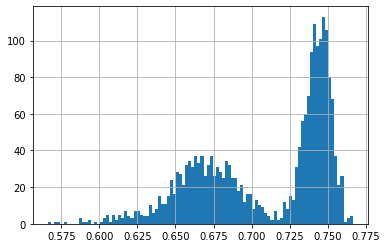

In [101]:
pd.DataFrame(imp_list, columns=['feats', 'score', 'len'])['score'].hist(bins=100)

In [103]:
len(imp_list[0][0]), len(imp_list[-1][0])

(15, 50)

In [104]:
c = []
imp50 = []
all_used=[]
for item in imp_list:
    if len(item[0])<50:
        imp15.append(item)
    else:
        imp50.append(item)
    all_used.extend(item[0])

In [50]:
t = pd.DataFrame(imp_list, columns=['feats', 'score', 'len'])

In [105]:
all_used=[]
for item in imp_list:
    all_used.extend(item[0])

In [106]:
len(all_used), len(set(all_used))

(72585, 937)

In [ ]:
t15=pd.DataFrame(imp15, columns=['feats', 'score', 'len'])
t15['score'].hist(bins=50)


In [298]:
upper_list = []
lower_list = []
for item in imp15:
    if item[1]>0.68:
        upper_list.extend(item[0])
    elif item[1]<0.65:
        lower_list.extend(item[0])

<AxesSubplot:>

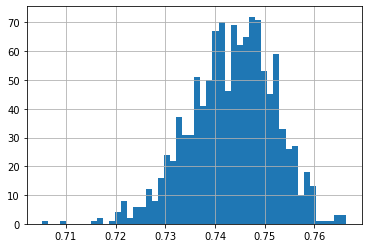

In [221]:
pd.DataFrame(imp50, columns=['feats', 'score', 'len'])['score'].hist(bins=50)

In [222]:
upper_list = []
lower_list = []
for item in imp50:
    if item[1]>0.75:
        upper_list.extend(item[0])
    elif item[1]<0.74:
        lower_list.extend(item[0])

In [299]:
len(upper_list), len(set(upper_list)), len(upper_list)/15, len(imp_list)

(4380, 927, 292.0, 2109)

In [300]:
len(lower_list), len(set(lower_list))

(2835, 873)

In [301]:
t_upper = pd.DataFrame(data={'feat': upper_list})

<AxesSubplot:>

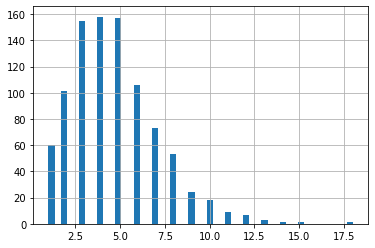

In [302]:
t_upper['feat'].value_counts().hist(bins=50)

In [303]:
t_upper['feat'].value_counts()[t_upper['feat'].value_counts()>=15]

P_2__last2max     18
B_9__last__log    15
Name: feat, dtype: int64

In [304]:
t_lower = pd.DataFrame(data={'feat': lower_list})

<AxesSubplot:>

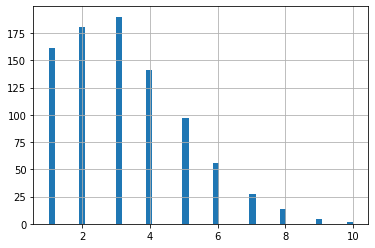

In [305]:
t_lower['feat'].value_counts().hist(bins=50)

In [263]:
tt_upper_feats = t_upper['feat'].value_counts()[t_upper['feat'].value_counts()>=12].index.tolist()
tt_lower_feats = t_lower['feat'].value_counts()[t_lower['feat'].value_counts()>=25].index.tolist()

In [308]:
print(t_lower['feat'].value_counts()[t_lower['feat'].value_counts()>=8].index.tolist())

['D_113__last', 'B_20__first', 'D_121__max', 'S_15__first', 'D_72__std', 'D_70__mean2std', 'D_128__mean', 'D_68__nunique', 'D_109__mean', 'B_36__last__log', 'D_115__max', 'R_11__last', 'B_36__last', 'R_9__mean2std', 'D_88__last', 'D_136__last__log', 'D_94__last', 'D_82__last', 'D_113__first', 'S_6__range']


In [264]:
nn_feats = set(tt_upper_feats) - set(tt_lower_feats)
len(nn_feats), len(tt_upper_feats), len(tt_lower_feats)

(533, 657, 193)

In [265]:
print(list(nn_feats))

['D_129__mean', 'D_129__last', 'D_107__last__log', 'D_49__last__log', 'B_1__max', 'D_112__range', 'D_43__min', 'D_78__last', 'D_39__range', 'D_52__max', 'S_15__range', 'B_2__max', 'D_113__max', 'B_12__last', 'B_17__mean', 'D_78__std', 'P_2__max', 'D_76__last', 'D_49__mean2std', 'B_9__min', 'R_6__mean__log', 'R_14__last__log', 'B_19__std', 'D_70__range', 'D_131__mean', 'B_30=2.0', 'B_3__max', 'D_92__mean__log', 'P_4__first', 'D_74__last', 'B_28__min', 'D_79__mean', 'B_33__first', 'S_3__min', 'D_74__range', 'D_44__mean__log', 'S_11__mean', 'B_4__mean', 'S_15__max', 'S_8__last2max', 'D_43__last__log', 'D_115__min', 'R_2__mean__log', 'D_71__last__log', 'S_20__std', 'R_5__mean', 'D_130__min', 'D_71__last', 'R_13__mean2std', 'P_2__min', 'B_2__min', 'D_79__last__log', 'D_121__mean', 'D_73__last', 'B_21__last', 'B_28__mean', 'S_16__mean__log', 'R_3__last', 'D_41__std', 'D_60__last', 'D_75__first', 'R_24__std', 'D_44__last__log', 'D_131__last__log', 'R_2__max', 'D_43__mean__log', 'D_69__last', 

In [349]:
feats486 = ['D_48__max', 'D_129__mean', 'D_129__last', 'D_107__last__log', 'D_49__last__log', 'B_1__max', 'D_112__range', 'D_43__min', 'D_39__range', 'D_78__last', 'S_15__range', 'B_18__last', 'D_113__max', 'R_15__mean__log', 'B_12__last', 'B_23__last2max', 'S_24__mean', 'S_20__max', 'R_8__range', 'P_2__max', 'B_9__min', 'R_6__mean__log', 'D_70__range', 'R_4__mean', 'B_3__max', 'D_133__max', 'D_92__mean__log', 'B_18__last__log', 'D_92__max', 'P_4__first', 'D_74__last', 'B_28__min', 'D_121__first', 'D_131__max', 'D_79__mean', 'R_24__max', 'S_3__min', 'D_74__range', 'D_44__mean__log', 'B_4__mean', 'D_119__min', 'D_43__last__log', 'D_115__min', 'B_37__range', 'R_5__mean', 'D_130__min', 'D_71__last', 'R_13__mean2std', 'P_2__min', 'B_40__last', 'D_121__mean', 'B_28__mean', 'R_3__last', 'D_41__std', 'D_60__last', 'D_44__last__log', 'D_70__last', 'S_6__min', 'D_53__range', 'R_4__last__log', 'R_2__max', 'D_43__mean__log', 'R_4__mean__log', 'B_2__last', 'D_77__first', 'D_135__last__log', 'P_3__min', 'B_16__range', 'D_75__std', 'B_9__range', 'S_11__min', 'D_134__mean2std', 'B_4__last__log', 'D_55__range', 'R_1__range', 'B_2__last__log', 'D_48__std', 'S_6__max', 'D_120=1.0', 'D_64=U', 'D_44__last', 'B_11__mean__log', 'B_37__min', 'S_17__min', 'B_23__last', 'P_4__range', 'R_5__range', 'D_55__min', 'S_5__last', 'B_8__last__log', 'D_39__mean__log', 'S_23__mean', 'B_2__last2max', 'D_131__range', 'D_112__mean', 'B_19__min', 'B_19__first', 'D_137__last__log', 'S_11__std', 'D_84__last', 'B_8__mean__log', 'B_26__last__log', 'R_6__last__log', 'S_8__min', 'B_20__mean2std', 'B_7__last', 'D_61__last', 'S_3__std', 'D_45__last__log', 'B_30=1.0', 'D_62__mean', 'B_12__mean__log', 'R_10__mean__log', 'B_8__min', 'R_8__std', 'B_27__last__log', 'R_7__std', 'D_61__first', 'D_106__mean2std', 'B_4__range', 'R_7__mean__log', 'S_3__range', 'R_8__mean', 'B_40__last__log', 'D_78__first', 'D_58__last2max', 'B_1__range', 'R_1__last__log', 'D_42__range', 'D_81__range', 'D_130__max', 'S_23__last', 'R_15__mean', 'B_4__first', 'B_20__range', 'D_48__min', 'B_22__last__log', 'D_58__range', 'B_3__last2max', 'S_25__mean', 'B_26__last', 'D_44__first', 'B_19__mean', 'B_24__max', 'D_128__last__log', 'D_120__last', 'D_78__last__log', 'D_111__last', 'D_53__mean', 'D_52__first', 'D_43__max', 'B_20__last2max', 'D_45__max', 'D_80__last', 'D_44__std', 'D_74__last__log', 'D_127__last__log', 'D_77__range', 'D_58__last__log', 'B_5__mean', 'D_112__last2max', 'P_3__mean', 'B_38__last', 'B_23__std', 'B_1__last2max', 'D_89__mean', 'B_25__last2max', 'D_65__last__log', 'S_13__last2max', 'D_59__min', 'D_70__std', 'P_2__range', 'D_71__mean__log', 'D_39__max', 'S_25__min', 'D_44__max', 'D_46__last', 'R_1__max', 'D_107__mean__log', 'D_58__last', 'P_4__max', 'B_1__last', 'D_55__std', 'D_60__last__log', 'D_84__mean', 'D_92__last', 'B_10__max', 'D_135__last', 'P_3__last', 'D_93__last', 'B_9__last__log', 'R_20__std', 'B_6__min', 'D_41__min', 'S_8__mean', 'D_79__std', 'R_5__std', 'R_26__mean2std', 'D_61__min', 'S_7__first', 'D_112__min', 'R_6__last', 'R_7__last', 'R_21__max', 'B_3__last__log', 'D_39__std', 'D_68=6.0', 'R_1__mean', 'B_14__mean', 'B_11__range', 'D_39__mean', 'D_58__min', 'B_19__max', 'R_15__range', 'D_133__mean__log', 'B_28__max', 'B_19__last', 'B_11__last2max', 'S_7__max', 'D_65__mean__log', 'D_79__first', 'R_16__max', 'B_10__mean', 'S_15__last', 'B_19__last__log', 'B_8__max', 'D_130__mean', 'D_74__mean__log', 'B_4__last', 'D_51__first', 'D_42__min', 'R_5__last', 'R_22__max', 'B_21__mean__log', 'R_1__std', 'D_78__mean__log', 'S_25__first', 'P_2__first', 'D_51__mean', 'B_3__range', 'S_27__last', 'S_22__max', 'B_38__nunique', 'D_45__last', 'B_14__last', 'D_65__range', 'D_144__last', 'D_39__last', 'B_17__last', 'D_48__last', 'D_89__std', 'R_10__last', 'B_18__mean__log', 'R_1__last', 'R_10__last__log', 'D_54__range', 'B_16__last2max', 'S_23__max', 'R_27__min', 'B_2__mean__log', 'P_3__first', 'D_112__last__log', 'D_72__last', 'S_22__last', 'B_5__last__log', 'S_27__mean2std', 'D_50__last', 'D_51__max', 'S_24__max', 'B_18__min', 'R_27__max', 'D_54__min', 'D_113__last__log', 'D_43__range', 'D_55__max', 'D_52__mean', 'B_22__max', 'D_89__max', 'D_45__mean', 'R_13__range', 'R_14__mean__log', 'B_38=2.0', 'D_132__min', 'D_106__last', 'S_7__last', 'D_41__range', 'R_2__last2min', 'S_8__last', 'B_9__last2max', 'D_78__mean', 'B_6__last2max', 'R_4__max', 'D_41__last__log', 'R_21__std', 'D_72__max', 'B_9__mean', 'B_32__range', 'D_65__mean', 'B_23__max', 'D_51__std', 'B_24__mean__log', 'S_23__std', 'D_53__last__log', 'D_42__last', 'D_59__last', 'R_16__std', 'S_9__max', 'D_84__range', 'D_44__range', 'R_8__mean__log', 'P_2__last', 'D_115__last', 'D_45__first', 'D_59__max', 'D_130__mean__log', 'S_7__mean', 'R_1__mean__log', 'R_3__max', 'B_3__std', 'D_72__mean__log', 'D_75__min', 'R_17__range', 'B_32__last__log', 'P_2__std', 'R_8__max', 'D_84__std', 'B_17__min', 'R_21__mean', 'D_114__nunique', 'R_4__last', 'B_9__last', 'D_46__mean', 'D_77__min', 'D_75__last', 'B_9__mean__log', 'D_55__first', 'D_79__mean__log', 'B_4__max', 'B_10__first', 'D_47__min', 'B_24__last__log', 'B_37__mean', 'B_14__last2max', 'D_109__last', 'S_3__max', 'D_62__max', 'R_10__range', 'R_21__range', 'R_10__mean', 'D_79__last', 'B_37__std', 'B_5__mean__log', 'B_4__min', 'D_74__last2max', 'B_1__mean', 'D_78__max', 'S_23__range', 'D_84__last__log', 'D_42__first', 'B_37__max', 'B_18__first', 'D_55__mean', 'P_4__min', 'D_115__mean', 'S_24__last', 'D_102__last', 'D_41__mean', 'R_8__last', 'B_2__std', 'R_1__last2min', 'D_55__last__log', 'D_77__last', 'B_6__first', 'D_59__mean', 'R_15__std', 'B_28__last2max', 'B_7__last2max', 'B_22__last', 'B_29__last__log', 'D_47__max', 'B_25__min', 'D_64__last=O', 'R_7__mean', 'R_25__range', 'B_9__max', 'R_3__first', 'D_47__first', 'B_2__first', 'B_11__min', 'D_65__max', 'B_3__mean__log', 'D_54__mean', 'B_23__min', 'D_53__mean__log', 'D_84__max', 'B_16__min', 'D_131__last', 'B_16__mean', 'B_23__last__log', 'D_118__first', 'R_8__last__log', 'S_20__last', 'D_132__mean2std', 'D_122__mean', 'R_6__std', 'D_75__mean', 'B_22__mean', 'D_42__max', 'B_10__last', 'R_2__first', 'B_4__last2max', 'B_20__last', 'D_39__last__log', 'B_7__first', 'B_37__last', 'P_2__last2max', 'R_3__mean', 'B_20__last__log', 'R_13__std', 'B_16__first', 'P_2__mean', 'D_55__last', 'D_122__min', 'R_2__range', 'R_16__range', 'D_44__last2max', 'B_22__min', 'D_75__range', 'D_43__std', 'D_75__last__log', 'D_96__last', 'B_17__last__log', 'R_20__last', 'B_17__last2max', 'D_45__mean__log', 'D_138__last', 'B_30__nunique', 'D_43__last', 'D_47__mean', 'B_11__last', 'R_2__last', 'D_134__min', 'R_6__max', 'B_2__range', 'B_1__first', 'D_41__max', 'D_70__mean', 'D_120=0.0', 'S_25__std', 'D_77__mean', 'D_74__min', 'S_25__last', 'B_33__last', 'B_2__mean', 'D_102__max', 'B_33__last__log', 'D_125__last__log', 'D_114=0.0', 'B_16__max', 'B_25__last', 'R_20__mean__log', 'D_75__mean__log', 'R_10__first', 'S_3__last', 'B_26__mean__log', 'D_118__min', 'R_28__last__log', 'R_2__std', 'R_16__mean__log', 'P_4__std', 'D_65__std', 'D_51__mean__log', 'D_75__last2max', 'D_112__last', 'S_20__mean', 'D_131__mean__log', 'B_3__last', 'R_11__std', 'R_2__last__log', 'R_13__last', 'S_25__last2max', 'S_15__std', 'D_123__last__log', 'D_58__max', 'B_25__mean', 'B_1__min']
feats497 = ['D_48__max', 'D_107__last__log', 'D_49__last__log', 'B_1__max', 'D_112__range', 'D_43__min', 'D_39__range', 'D_78__last', 'B_42__last__log', 'B_18__last', 'R_15__mean__log', 'B_12__last', 'B_17__mean', 'R_13__mean__log', 'S_24__mean', 'R_17__mean__log', 'R_8__range', 'P_2__max', 'B_9__min', 'R_14__last__log', 'B_19__std', 'D_70__range', 'R_4__mean', 'B_30=2.0', 'B_3__max', 'D_92__mean__log', 'B_18__last__log', 'D_92__max', 'P_4__first', 'D_74__last', 'B_28__min', 'D_121__first', 'D_131__max', 'D_79__mean', 'R_24__max', 'S_3__min', 'D_74__range', 'D_44__mean__log', 'B_4__mean', 'R_13__max', 'S_15__max', 'S_8__last2max', 'D_119__min', 'D_43__last__log', 'D_115__min', 'R_2__mean__log', 'R_27__mean', 'B_37__range', 'S_6__last2max', 'R_5__mean', 'D_130__min', 'D_71__last', 'R_13__mean2std', 'P_2__min', 'B_40__last', 'D_52__min', 'R_3__last', 'D_41__std', 'D_60__last', 'D_120=999.0', 'D_44__last__log', 'D_53__range', 'D_131__last__log', 'R_4__last__log', 'R_2__max', 'D_43__mean__log', 'R_4__mean__log', 'B_2__last', 'D_135__last__log', 'P_3__min', 'B_16__range', 'B_11__max', 'S_11__min', 'B_4__last__log', 'D_55__range', 'R_1__range', 'B_2__last__log', 'D_48__std', 'S_6__max', 'D_53__mean2std', 'D_120=1.0', 'R_14__last', 'D_64=U', 'D_44__last', 'B_11__mean__log', 'B_37__min', 'S_17__min', 'B_23__last', 'B_5__last', 'D_48__mean', 'R_5__range', 'S_22__first', 'S_5__last', 'D_39__mean__log', 'S_23__mean', 'B_2__last2max', 'D_131__range', 'B_23__mean', 'D_112__mean', 'D_83__last', 'R_24__last', 'R_3__std', 'D_113__mean__log', 'B_19__min', 'S_11__std', 'D_84__last', 'B_8__mean__log', 'B_26__last__log', 'B_16__last', 'R_6__last__log', 'D_79__range', 'S_8__min', 'B_7__last', 'D_39__mean2std', 'D_61__last', 'D_45__last__log', 'B_30=1.0', 'D_62__mean', 'R_10__mean__log', 'B_8__min', 'R_8__std', 'D_120__nunique', 'B_27__last__log', 'R_7__std', 'R_12__mean', 'D_61__first', 'D_106__mean2std', 'B_4__range', 'D_81__mean__log', 'R_8__mean', 'S_3__range', 'B_40__last__log', 'D_78__first', 'D_58__last2max', 'B_1__range', 'D_124__last', 'R_1__last__log', 'R_2__min', 'D_130__max', 'S_23__last', 'R_15__mean', 'D_48__range', 'B_4__first', 'B_20__range', 'D_48__min', 'B_22__last__log', 'D_58__range', 'B_3__last2max', 'S_25__mean', 'B_26__last', 'D_44__first', 'B_19__mean', 'D_128__last__log', 'D_78__last__log', 'D_111__last', 'D_53__mean', 'D_43__max', 'B_20__last2max', 'D_45__max', 'D_44__std', 'D_74__last__log', 'D_127__last__log', 'D_77__range', 'B_5__mean', 'D_112__last2max', 'P_3__mean', 'B_38__last', 'B_23__std', 'B_1__last2max', 'B_25__last2max', 'D_65__last__log', 'S_13__last2max', 'D_59__min', 'D_70__std', 'P_2__range', 'D_39__max', 'S_25__min', 'D_44__max', 'D_46__last', 'R_1__max', 'S_23__mean2std', 'D_56__last', 'B_23__range', 'D_107__mean__log', 'D_58__last', 'P_4__max', 'B_1__last', 'D_55__std', 'D_60__last__log', 'D_84__mean', 'D_92__last', 'D_77__max', 'B_10__max', 'D_135__last', 'P_3__last', 'D_93__last', 'B_9__last__log', 'R_20__std', 'B_6__min', 'D_41__min', 'B_32__std', 'S_8__mean', 'D_79__std', 'S_6__last', 'R_5__std', 'R_26__mean2std', 'D_61__min', 'S_7__first', 'D_116__nunique', 'R_10__max', 'R_6__last', 'R_7__last', 'D_123__mean', 'R_21__max', 'B_3__last__log', 'D_39__std', 'D_68=6.0', 'R_1__mean', 'B_14__mean', 'R_10__std', 'B_18__last2max', 'B_3__mean', 'D_39__mean', 'B_19__max', 'B_7__min', 'D_133__mean__log', 'B_28__max', 'B_19__last', 'B_11__last2max', 'D_48__last2max', 'D_74__mean', 'D_108__last__log', 'S_7__max', 'R_16__max', 'B_10__mean', 'S_15__last', 'D_52__last', 'B_19__last__log', 'B_8__max', 'D_130__mean', 'D_74__mean__log', 'R_25__max', 'B_4__last', 'D_51__first', 'D_42__min', 'R_5__last', 'R_22__max', 'R_1__std', 'D_78__mean__log', 'S_25__first', 'P_2__first', 'B_21__last__log', 'D_51__mean', 'B_3__range', 'S_27__last', 'S_22__max', 'D_62__min', 'D_45__last', 'D_65__range', 'R_1__min', 'D_41__last', 'B_17__last', 'D_48__last', 'D_119__max', 'D_72__range', 'D_89__std', 'R_10__last', 'B_18__mean__log', 'R_1__last', 'D_70__first', 'B_10__last2max', 'R_10__last__log', 'R_2__mean', 'D_54__range', 'B_16__last2max', 'S_23__max', 'R_27__min', 'B_2__mean__log', 'P_3__first', 'B_33__max', 'D_112__last__log', 'S_6__std', 'D_72__last', 'S_22__last', 'S_27__mean2std', 'D_50__last', 'D_51__max', 'S_24__max', 'B_18__min', 'R_27__max', 'D_41__mean__log', 'D_43__range', 'D_55__max', 'D_52__mean', 'D_138__mean2std', 'D_89__max', 'R_13__range', 'B_38=2.0', 'S_12__max', 'D_132__min', 'D_106__last', 'B_33__mean__log', 'S_7__last', 'D_41__range', 'R_2__last2min', 'B_9__last2max', 'D_78__mean', 'B_6__last2max', 'R_4__max', 'D_41__last__log', 'D_72__max', 'B_9__mean', 'B_37__last2max', 'B_32__range', 'D_65__mean', 'B_38=4.0', 'D_51__std', 'B_24__mean__log', 'S_23__std', 'D_42__last', 'D_59__last', 'R_16__std', 'D_84__range', 'D_44__range', 'D_54__last2max', 'R_8__mean__log', 'B_8__mean', 'P_2__last', 'D_45__first', 'D_118__last__log', 'D_58__mean__log', 'R_1__mean__log', 'R_3__max', 'B_3__std', 'D_72__mean__log', 'D_75__min', 'R_17__range', 'B_32__last__log', 'P_2__std', 'R_8__max', 'D_84__std', 'B_17__min', 'D_61__last2max', 'R_27__first', 'R_21__mean', 'B_33__mean', 'D_44__mean', 'R_4__last', 'R_11__mean', 'B_9__last', 'D_46__mean', 'D_77__min', 'D_75__last', 'B_31__nunique', 'D_55__first', 'B_12__last__log', 'D_79__mean__log', 'B_4__max', 'B_10__first', 'D_47__min', 'B_24__last__log', 'B_37__mean', 'B_14__last2max', 'S_22__mean', 'S_3__max', 'D_62__max', 'D_118__last', 'R_10__range', 'R_10__mean', 'D_79__last', 'B_37__std', 'B_5__mean__log', 'D_112__std', 'B_1__mean', 'D_78__max', 'S_23__range', 'B_17__mean__log', 'D_84__last__log', 'D_42__first', 'B_37__max', 'B_18__first', 'D_55__mean', 'D_48__first', 'P_4__min', 'D_115__mean', 'S_24__last', 'D_102__last', 'D_41__mean', 'R_8__last', 'D_55__last__log', 'D_77__last', 'B_6__first', 'R_15__std', 'B_28__last2max', 'B_7__last2max', 'B_22__last', 'B_29__last__log', 'D_47__max', 'B_25__min', 'D_74__max', 'D_69__min', 'R_25__range', 'B_9__max', 'R_3__first', 'D_47__first', 'B_2__first', 'B_11__min', 'D_65__max', 'R_17__std', 'B_3__mean__log', 'D_54__mean', 'B_23__min', 'D_53__mean__log', 'D_84__max', 'B_16__min', 'B_42__last', 'R_3__range', 'D_131__last', 'B_16__mean', 'B_23__last__log', 'D_118__first', 'R_8__last__log', 'S_16__last', 'R_6__std', 'D_75__mean', 'D_42__max', 'B_11__mean', 'B_4__last2max', 'B_20__last', 'D_39__last__log', 'B_37__last', 'P_2__last2max', 'R_3__mean', 'B_20__last__log', 'R_13__std', 'B_16__first', 'P_2__mean', 'D_55__last', 'D_122__min', 'D_116=999.0', 'R_16__range', 'D_44__last2max', 'D_75__range', 'D_43__std', 'D_75__last__log', 'B_17__last__log', 'B_17__last2max', 'D_55__mean__log', 'D_45__mean__log', 'D_138__last', 'D_43__last', 'D_47__mean', 'B_11__last', 'D_134__min', 'R_6__max', 'B_2__range', 'B_1__first', 'D_41__max', 'D_70__mean', 'D_120=0.0', 'S_25__std', 'D_77__mean', 'D_137__last', 'D_74__min', 'S_25__last', 'B_33__last', 'R_5__max', 'B_2__mean', 'B_33__last__log', 'D_121__last', 'D_125__last__log', 'B_25__last', 'D_75__mean__log', 'R_10__first', 'S_3__last', 'B_26__mean__log', 'D_118__min', 'R_28__last__log', 'R_2__std', 'R_16__mean__log', 'P_4__std', 'D_65__std', 'D_51__mean__log', 'D_75__last2max', 'D_112__last', 'S_20__mean', 'D_131__mean__log', 'B_3__last', 'S_20__range', 'R_2__last__log', 'D_131__std', 'R_13__last', 'S_25__last2max', 'S_15__std', 'D_123__last__log', 'D_58__max', 'B_25__mean']
feats641 = ['B_10__last', 'B_10__last2max', 'B_10__mean', 'B_10__min', 'B_11__last', 'B_11__last2max', 'B_11__last__log', 'B_12__last', 'B_12__last__log', 'B_12__mean__log', 'B_13__last', 'B_14__last', 'B_14__last2max', 'B_14__min', 'B_15__last', 'B_15__mean', 'B_16__first', 'B_16__range', 'B_16__std', 'B_17__last', 'B_17__last2max', 'B_17__mean', 'B_17__mean__log', 'B_17__min', 'B_18__last2max', 'B_18__min', 'B_19__last2max', 'B_19__range', 'B_19__std', 'B_1__last', 'B_1__last2max', 'B_1__max', 'B_1__std', 'B_20__last', 'B_20__last2max', 'B_20__mean', 'B_21__last', 'B_21__last__log', 'B_21__max', 'B_21__mean__log', 'B_22__first', 'B_22__last', 'B_22__last__log', 'B_22__max', 'B_22__min', 'B_22__range', 'B_23__last', 'B_23__last2max', 'B_23__last__log', 'B_23__range', 'B_23__std', 'B_24__last', 'B_24__last__log', 'B_24__max', 'B_24__mean', 'B_24__mean__log', 'B_24__std', 'B_25__last', 'B_25__last2max', 'B_25__min', 'B_26__last', 'B_26__last__log', 'B_26__mean__log', 'B_27__last', 'B_28__first', 'B_28__last2max', 'B_28__mean', 'B_28__min', 'B_2__last', 'B_2__last2max', 'B_2__last__log', 'B_2__mean', 'B_2__mean__log', 'B_2__min', 'B_32__last', 'B_32__last__log', 'B_32__max', 'B_32__mean__log', 'B_32__range', 'B_32__std', 'B_33__first', 'B_33__last', 'B_36__last', 'B_36__last__log', 'B_37__last', 'B_37__last2max', 'B_37__max', 'B_37__min', 'B_37__std', 'B_3__last', 'B_3__last2max', 'B_3__last__log', 'B_3__max', 'B_3__range', 'B_3__std', 'B_40__last2max', 'B_40__max', 'B_40__mean__log', 'B_40__min', 'B_41__last', 'B_41__last__log', 'B_4__last', 'B_4__last2max', 'B_4__last__log', 'B_4__max', 'B_4__mean__log', 'B_4__min', 'B_4__range', 'B_4__std', 'B_5__last', 'B_5__last__log', 'B_5__mean', 'B_5__mean__log', 'B_6__last2max', 'B_6__min', 'B_7__last', 'B_7__last2max', 'B_7__max', 'B_7__range', 'B_7__std', 'B_8__first', 'B_8__last', 'B_8__last__log', 'B_8__max', 'B_8__mean', 'B_8__mean__log', 'B_8__min', 'B_9__last', 'B_9__last2max', 'B_9__last__log', 'B_9__max', 'B_9__mean', 'B_9__mean__log', 'B_9__min', 'B_9__std', 'D_102__max', 'D_103__last', 'D_104__last', 'D_105__max', 'D_107__last', 'D_107__last__log', 'D_107__max', 'D_107__mean__log', 'D_109__last', 'D_109__last__log', 'D_109__mean', 'D_112__last', 'D_112__last2max', 'D_112__last__log', 'D_112__mean', 'D_112__mean__log', 'D_112__min', 'D_112__range', 'D_112__std', 'D_113__last', 'D_113__max', 'D_115__first', 'D_115__min', 'D_118__first', 'D_118__last__log', 'D_118__mean__log', 'D_118__min', 'D_119__first', 'D_119__last', 'D_119__min', 'D_121__first', 'D_121__last', 'D_121__max', 'D_121__mean', 'D_121__min', 'D_122__first', 'D_122__last', 'D_122__max', 'D_122__mean', 'D_122__mean__log', 'D_122__min', 'D_123__last__log', 'D_123__mean', 'D_124__last', 'D_125__last', 'D_125__last__log', 'D_127__first', 'D_127__last', 'D_127__last__log', 'D_127__max', 'D_127__mean', 'D_127__mean__log', 'D_127__range', 'D_127__std', 'D_128__first', 'D_128__last', 'D_128__last__log', 'D_128__max', 'D_128__mean', 'D_128__mean__log', 'D_128__min', 'D_129__last', 'D_129__max', 'D_129__mean', 'D_130__first', 'D_130__last', 'D_130__max', 'D_130__mean', 'D_130__min', 'D_131__first', 'D_131__last', 'D_131__last__log', 'D_131__max', 'D_131__mean', 'D_131__min', 'D_131__range', 'D_131__std', 'D_133__last', 'D_133__last__log', 'D_133__max', 'D_133__mean__log', 'D_133__min', 'D_139__last', 'D_139__mean', 'D_140__last', 'D_140__last__log', 'D_140__max', 'D_141__last', 'D_143__last', 'D_144__last', 'D_145__last', 'D_39__last', 'D_39__last__log', 'D_39__max', 'D_39__mean', 'D_39__mean__log', 'D_39__range', 'D_39__std', 'D_41__last', 'D_41__last__log', 'D_41__max', 'D_41__mean', 'D_41__mean__log', 'D_41__min', 'D_41__range', 'D_41__std', 'D_42__first', 'D_42__last', 'D_42__max', 'D_42__mean', 'D_42__min', 'D_43__first', 'D_43__last', 'D_43__last__log', 'D_43__max', 'D_43__mean', 'D_43__mean__log', 'D_43__min', 'D_43__range', 'D_43__std', 'D_44__first', 'D_44__last', 'D_44__last2max', 'D_44__last__log', 'D_44__max', 'D_44__range', 'D_44__std', 'D_45__first', 'D_45__last', 'D_45__last__log', 'D_45__max', 'D_45__mean', 'D_45__mean__log', 'D_45__min', 'D_46__last', 'D_46__mean', 'D_46__min', 'D_47__first', 'D_47__last', 'D_47__max', 'D_47__mean', 'D_47__min', 'D_48__first', 'D_48__last', 'D_48__last2max', 'D_48__max', 'D_48__mean', 'D_48__min', 'D_48__range', 'D_48__std', 'D_49__last', 'D_49__last__log', 'D_50__last', 'D_51__first', 'D_51__last', 'D_51__last__log', 'D_51__max', 'D_51__mean', 'D_51__mean__log', 'D_51__min', 'D_51__range', 'D_51__std', 'D_52__first', 'D_52__last', 'D_52__max', 'D_52__mean', 'D_52__min', 'D_54__last', 'D_54__last2max', 'D_54__mean', 'D_54__min', 'D_54__range', 'D_54__std', 'D_55__first', 'D_55__last2max', 'D_55__max', 'D_55__min', 'D_55__range', 'D_55__std', 'D_56__min', 'D_58__range', 'D_59__first', 'D_59__last', 'D_59__max', 'D_59__mean', 'D_59__min', 'D_60__last', 'D_60__last__log', 'D_60__max', 'D_61__first', 'D_61__last', 'D_61__last2max', 'D_61__max', 'D_61__mean', 'D_61__min', 'D_62__first', 'D_62__last', 'D_62__last2max', 'D_62__max', 'D_62__mean', 'D_62__min', 'D_65__last', 'D_65__last__log', 'D_65__max', 'D_65__mean', 'D_65__mean__log', 'D_65__range', 'D_65__std', 'D_69__last', 'D_69__min', 'D_70__first', 'D_70__last', 'D_70__last__log', 'D_70__max', 'D_70__mean__log', 'D_70__min', 'D_70__std', 'D_71__last', 'D_71__last__log', 'D_71__mean__log', 'D_72__last', 'D_72__last__log', 'D_72__max', 'D_72__mean', 'D_72__mean__log', 'D_72__min', 'D_72__range', 'D_72__std', 'D_74__first', 'D_74__range', 'D_74__std', 'D_75__range', 'D_75__std', 'D_77__max', 'D_77__mean', 'D_77__min', 'D_78__first', 'D_78__last', 'D_78__last__log', 'D_78__mean__log', 'D_78__range', 'D_79__first', 'D_79__last', 'D_79__last__log', 'D_79__max', 'D_79__mean', 'D_79__mean__log', 'D_79__min', 'D_79__range', 'D_79__std', 'D_80__last', 'D_81__last', 'D_81__last__log', 'D_81__max', 'D_81__mean', 'D_81__std', 'D_83__last', 'D_84__last', 'D_84__last__log', 'D_84__max', 'D_84__mean', 'D_86__last', 'D_89__last', 'D_89__max', 'D_89__mean', 'D_89__range', 'D_89__std', 'D_91__last', 'D_91__max', 'D_91__mean__log', 'D_92__last', 'D_92__max', 'D_92__mean', 'D_92__mean__log', 'D_93__last', 'D_94__last', 'D_96__last', 'P_2__first', 'P_2__last', 'P_2__last2max', 'P_2__max', 'P_2__mean', 'P_2__min', 'P_2__range', 'P_2__std', 'P_3__first', 'P_3__last', 'P_3__last2max', 'P_3__max', 'P_3__mean', 'P_3__min', 'P_3__range', 'P_3__std', 'P_4__first', 'P_4__last__log', 'P_4__mean', 'P_4__min', 'P_4__range', 'P_4__std', 'R_10__first', 'R_10__last', 'R_10__last__log', 'R_10__max', 'R_10__mean__log', 'R_10__std', 'R_11__last', 'R_11__max', 'R_11__mean', 'R_11__mean__log', 'R_11__std', 'R_12__last', 'R_12__max', 'R_12__mean', 'R_12__min', 'R_12__range', 'R_12__std', 'R_13__last', 'R_13__max', 'R_13__mean', 'R_13__range', 'R_13__std', 'R_14__last', 'R_14__last__log', 'R_14__mean__log', 'R_15__last', 'R_15__max', 'R_15__mean', 'R_15__mean__log', 'R_15__range', 'R_15__std', 'R_16__last', 'R_16__max', 'R_16__mean', 'R_16__mean__log', 'R_16__std', 'R_17__last', 'R_17__max', 'R_17__mean__log', 'R_17__range', 'R_18__last', 'R_18__max', 'R_19__last', 'R_19__min', 'R_1__first', 'R_1__last', 'R_1__last2min', 'R_1__last__log', 'R_1__max', 'R_1__mean', 'R_1__mean__log', 'R_1__min', 'R_1__std', 'R_20__last', 'R_20__max', 'R_20__mean', 'R_20__mean__log', 'R_20__std', 'R_21__last', 'R_21__max', 'R_21__mean', 'R_21__mean__log', 'R_21__range', 'R_21__std', 'R_22__last', 'R_22__max', 'R_22__range', 'R_23__last', 'R_24__last', 'R_24__max', 'R_24__mean__log', 'R_24__range', 'R_24__std', 'R_25__last', 'R_25__max', 'R_25__range', 'R_25__std', 'R_27__first', 'R_27__last', 'R_27__max', 'R_27__mean', 'R_27__min', 'R_28__last', 'R_28__last__log', 'R_2__first', 'R_2__last', 'R_2__last2min', 'R_2__last__log', 'R_2__max', 'R_2__mean', 'R_2__mean__log', 'R_2__min', 'R_2__range', 'R_2__std', 'R_3__first', 'R_3__last', 'R_3__last__log', 'R_3__max', 'R_3__mean', 'R_3__mean__log', 'R_3__min', 'R_3__range', 'R_3__std', 'R_4__last', 'R_4__last__log', 'R_4__max', 'R_4__min', 'R_4__std', 'R_5__last', 'R_5__last__log', 'R_5__max', 'R_5__mean__log', 'R_5__std', 'R_6__last', 'R_6__last__log', 'R_6__max', 'R_6__mean__log', 'R_7__last', 'R_7__last__log', 'R_7__max', 'R_7__mean', 'R_7__range', 'R_7__std', 'R_8__last', 'R_8__last__log', 'R_8__max', 'R_8__mean', 'R_8__mean__log', 'R_8__std', 'S_11__last', 'S_11__mean', 'S_11__min', 'S_11__std', 'S_12__last', 'S_12__max', 'S_13__last', 'S_13__last2max', 'S_13__min', 'S_15__first', 'S_15__last', 'S_15__max', 'S_15__mean', 'S_15__std', 'S_16__last', 'S_16__mean__log', 'S_17__last', 'S_17__min', 'S_18__last', 'S_19__last', 'S_20__last', 'S_20__max', 'S_20__mean', 'S_20__mean__log', 'S_20__range', 'S_20__std', 'S_22__first', 'S_22__last', 'S_22__max', 'S_22__mean', 'S_23__last', 'S_23__max', 'S_23__mean', 'S_23__range', 'S_23__std', 'S_24__last', 'S_24__max', 'S_24__mean', 'S_25__first', 'S_25__last', 'S_25__last2max', 'S_25__mean', 'S_25__min', 'S_25__range', 'S_25__std', 'S_26__last', 'S_26__last__log', 'S_27__last', 'S_27__last2max', 'S_27__last__log', 'S_27__std', 'S_3__first', 'S_3__last', 'S_3__max', 'S_3__mean', 'S_3__min', 'S_3__range', 'S_3__std', 'S_5__last', 'S_5__last__log', 'S_5__mean__log', 'S_6__last', 'S_6__max', 'S_6__min', 'S_6__range', 'S_7__first', 'S_7__last', 'S_7__max', 'S_7__mean', 'S_7__min', 'S_7__range', 'S_7__std', 'S_8__last', 'S_8__last2max', 'S_8__mean', 'S_8__min', 'S_9__last', 'S_9__max']
feats372 = ['R_3__last__log', 'D_129__mean', 'D_129__last', 'D_107__last__log', 'D_113__last', 'D_49__last__log', 'D_43__min', 'D_78__last', 'D_39__range', 'D_52__max', 'B_42__last__log', 'B_2__max', 'D_113__max', 'R_13__mean__log', 'R_17__mean__log', 'P_2__max', 'D_76__last', 'D_49__mean2std', 'B_19__std', 'D_70__range', 'D_131__mean', 'B_3__max', 'P_4__first', 'D_131__max', 'D_74__range', 'D_44__mean__log', 'S_11__mean', 'B_4__mean', 'S_8__last2max', 'D_43__last__log', 'R_2__mean__log', 'S_20__std', 'B_37__range', 'R_5__mean', 'D_130__min', 'P_2__min', 'D_52__min', 'B_2__min', 'D_79__last__log', 'D_121__mean', 'B_21__last', 'S_16__mean__log', 'R_3__last', 'D_60__last', 'D_120=999.0', 'D_44__last__log', 'D_43__mean__log', 'R_4__mean__log', 'D_77__first', 'B_2__last', 'D_47__last', 'P_3__min', 'D_75__std', 'B_4__last__log', 'R_1__range', 'B_2__last__log', 'S_26__last', 'R_20__max', 'D_44__last', 'B_37__min', 'B_5__last', 'B_23__last', 'S_17__min', 'P_4__range', 'D_48__mean', 'D_55__min', 'R_12__last', 'D_62__last2max', 'D_39__mean__log', 'R_21__mean__log', 'B_23__mean', 'R_11__mean__log', 'R_3__std', 'B_19__first', 'P_3__last2max', 'D_84__last', 'B_26__last__log', 'R_6__last__log', 'D_79__range', 'B_7__last', 'D_39__mean2std', 'S_5__mean__log', 'D_108__last', 'S_3__std', 'D_45__last__log', 'D_62__mean', 'B_12__mean__log', 'R_7__std', 'D_61__first', 'B_4__range', 'R_1__last__log', 'D_42__range', 'S_23__last', 'B_4__first', 'B_20__range', 'B_22__last__log', 'D_58__range', 'B_3__last2max', 'S_25__mean', 'B_26__last', 'D_46__mean2std', 'R_26__last', 'D_128__last__log', 'D_54__std', 'D_53__mean', 'D_52__first', 'D_43__max', 'D_45__max', 'B_9__std', 'S_3__first', 'D_44__std', 'B_5__mean', 'D_58__last__log', 'B_15__mean', 'P_3__mean', 'B_38__last', 'R_17__last', 'B_1__last2max', 'B_25__last2max', 'D_53__last', 'D_59__min', 'D_81__last__log', 'B_11__last__log', 'R_3__mean__log', 'P_2__range', 'D_39__max', 'D_44__max', 'D_46__last', 'S_12__last', 'D_74__std', 'D_56__last', 'D_107__mean__log', 'D_58__last', 'B_1__last', 'D_60__last__log', 'D_84__mean', 'D_77__max', 'D_132__last', 'S_7__std', 'D_81__std', 'P_3__range', 'B_28__last', 'P_3__last', 'B_36__last', 'S_18__last', 'D_46__min', 'D_117=999.0', 'B_9__last__log', 'B_20__first', 'D_79__max', 'B_21__max', 'S_6__last', 'R_6__range', 'D_116__nunique', 'D_68__last', 'B_7__max', 'B_3__last__log', 'D_39__std', 'D_122__last', 'D_68=6.0', 'R_1__mean', 'R_10__std', 'B_14__mean', 'B_18__last2max', 'B_3__mean', 'D_39__mean', 'R_11__range', 'B_19__max', 'R_15__range', 'B_7__min', 'B_20__min', 'B_28__max', 'D_48__last2max', 'B_11__last2max', 'B_19__last', 'D_74__mean', 'D_114__last', 'D_72__std', 'S_7__max', 'D_52__last', 'S_15__last', 'D_143__last', 'B_4__last', 'D_51__first', 'B_33__min', 'D_42__min', 'B_21__mean__log', 'D_78__mean__log', 'P_2__first', 'B_21__last__log', 'D_51__mean', 'D_127__first', 'B_3__range', 'D_62__min', 'D_45__last', 'B_14__last', 'D_65__range', 'D_122__max', 'S_17__last', 'D_39__last', 'D_41__last', 'D_48__last', 'B_6__mean', 'R_1__first', 'B_10__last2max', 'R_2__mean', 'D_54__range', 'D_77__mean__log', 'B_16__last2max', 'S_23__max', 'R_27__min', 'P_3__first', 'D_112__last__log', 'S_6__std', 'S_22__last', 'B_5__last__log', 'D_51__max', 'S_24__max', 'D_49__last', 'R_27__max', 'D_41__mean__log', 'D_54__min', 'D_55__max', 'B_22__max', 'R_12__min', 'S_25__range', 'B_4__mean__log', 'D_132__min', 'S_7__last', 'D_41__range', 'D_114=1.0', 'R_2__last2min', 'S_8__last', 'D_41__last__log', 'B_37__last2max', 'D_65__mean', 'D_45__min', 'D_74__first', 'B_4__std', 'B_22__std', 'D_42__last', 'S_23__std', 'D_54__last', 'D_59__last', 'D_44__range', 'D_54__last2max', 'P_2__last', 'D_58__std', 'D_115__last', 'D_45__first', 'D_58__mean__log', 'R_1__mean__log', 'R_3__max', 'R_17__range', 'D_91__last', 'S_27__last2max', 'P_2__std', 'D_84__std', 'D_112__mean__log', 'S_3__mean', 'B_24__std', 'R_4__last', 'B_9__last', 'D_46__mean', 'S_9__last', 'D_133__min', 'D_64__last=U', 'D_75__last', 'B_9__mean__log', 'D_55__first', 'B_4__max', 'D_79__mean__log', 'B_10__first', 'B_6__last', 'B_37__mean', 'S_3__max', 'D_42__mean', 'D_79__last', 'D_74__last2max', 'B_1__mean', 'D_78__max', 'D_42__first', 'B_37__max', 'B_18__first', 'D_51__last', 'B_16__std', 'D_55__mean', 'P_4__min', 'S_24__last', 'D_41__mean', 'B_2__std', 'B_13__last', 'B_28__last2max', 'B_7__last2max', 'B_22__last', 'D_47__max', 'D_64__last=O', 'B_16__mean__log', 'R_25__range', 'B_9__max', 'R_3__first', 'D_47__first', 'B_2__first', 'P_4__mean', 'B_3__min', 'D_84__max', 'B_11__first', 'D_119__mean__log', 'R_3__range', 'B_23__last__log', 'D_43__mean', 'D_122__mean', 'D_129__max', 'B_22__mean', 'S_19__last', 'D_42__max', 'B_10__last', 'S_13__min', 'B_11__mean', 'B_4__last2max', 'D_39__last__log', 'B_37__last', 'D_43__first', 'P_2__last2max', 'R_3__mean', 'R_13__std', 'B_16__first', 'P_2__mean', 'D_110__last', 'D_116=999.0', 'D_44__last2max', 'D_75__range', 'D_43__std', 'D_96__last', 'B_17__last__log', 'D_55__mean__log', 'B_17__last2max', 'D_140__max', 'D_45__mean__log', 'D_43__last', 'D_47__mean', 'B_11__last', 'D_131__first', 'S_13__last', 'R_2__last', 'B_19__mean__log', 'D_137__last', 'R_5__max', 'D_102__max', 'D_121__last', 'D_114=0.0', 'B_16__max', 'R_20__mean__log', 'D_75__mean__log', 'B_26__mean__log', 'D_62__range', 'R_16__mean__log', 'D_65__std', 'D_51__mean__log', 'D_112__last', 'B_3__last', 'D_56__mean2std', 'D_137__mean2std', 'R_2__last__log', 'R_11__last', 'D_131__std', 'S_25__last2max', 'P_4__last__log', 'D_58__max', 'D_130__last__log', 'B_25__mean', 'B_1__min']
feats394 = ['D_129__mean', 'D_49__last__log', 'B_1__max', 'D_112__range', 'D_39__range', 'D_52__max', 'S_15__range', 'D_113__max', 'B_12__last', 'B_17__mean', 'D_78__std', 'P_2__max', 'D_76__last', 'D_49__mean2std', 'R_14__last__log', 'D_70__range', 'D_131__mean', 'B_30=2.0', 'B_3__max', 'D_74__last', 'B_28__min', 'D_79__mean', 'B_33__first', 'D_44__mean__log', 'S_11__mean', 'B_4__mean', 'S_15__max', 'D_43__last__log', 'D_115__min', 'R_2__mean__log', 'R_5__mean', 'D_130__min', 'D_71__last', 'R_13__mean2std', 'P_2__min', 'B_2__min', 'D_79__last__log', 'D_121__mean', 'B_21__last', 'R_3__last', 'D_41__std', 'D_60__last', 'R_24__std', 'D_44__last__log', 'D_131__last__log', 'R_2__max', 'D_43__mean__log', 'D_69__last', 'D_77__first', 'B_2__last', 'D_47__last', 'P_3__min', 'B_11__max', 'D_75__std', 'S_11__min', 'B_4__last__log', 'R_9__last', 'D_55__range', 'B_2__last__log', 'R_9__mean2std', 'D_120=1.0', 'R_20__max', 'D_44__last', 'B_37__min', 'B_5__last', 'B_23__last', 'D_89__mean__log', 'S_17__min', 'D_48__mean', 'R_5__range', 'D_55__min', 'D_87__last', 'D_42__mean2std', 'S_5__last', 'D_39__mean__log', 'R_21__mean__log', 'D_131__range', 'D_112__mean', 'R_11__mean__log', 'R_3__std', 'B_19__first', 'P_3__last2max', 'D_84__last', 'B_8__mean__log', 'B_26__last__log', 'R_6__last__log', 'B_40__min', 'D_79__range', 'B_7__last', 'D_39__mean2std', 'S_5__mean__log', 'D_108__last', 'D_45__last__log', 'D_62__mean', 'B_12__mean__log', 'B_8__min', 'B_27__last__log', 'D_68=1.0', 'B_4__range', 'D_84__mean__log', 'B_40__last__log', 'D_82__last', 'D_124__last', 'R_1__last__log', 'R_12__std', 'D_127__std', 'S_23__last', 'B_20__range', 'B_22__last__log', 'D_58__range', 'D_128__max', 'D_44__first', 'B_26__last', 'S_25__mean', 'R_26__last', 'B_24__max', 'D_78__last__log', 'D_54__std', 'R_18__max', 'D_52__first', 'D_43__max', 'D_53__mean', 'D_45__max', 'S_3__first', 'R_19__min', 'D_127__last__log', 'D_70__mean2std', 'B_5__mean', 'D_58__last__log', 'D_112__last2max', 'P_3__mean', 'B_15__mean', 'B_38__last', 'B_1__last2max', 'B_25__last2max', 'D_51__last__log', 'D_53__last', 'D_59__min', 'S_13__last2max', 'B_11__last__log', 'B_8__last', 'R_3__mean__log', 'P_2__range', 'D_39__max', 'S_25__min', 'D_46__last', 'D_56__last', 'D_107__mean__log', 'D_58__last', 'B_1__last', 'D_55__std', 'D_84__mean', 'D_77__max', 'D_132__last', 'S_7__std', 'D_130__last', 'B_28__last', 'P_3__last', 'B_36__last', 'S_18__last', 'D_92__mean', 'D_46__min', 'D_117=999.0', 'B_9__last__log', 'D_79__max', 'D_113__mean', 'S_6__last', 'S_8__mean', 'D_79__std', 'R_26__mean2std', 'R_6__range', 'D_68__last', 'D_128__mean', 'D_39__std', 'D_122__last', 'R_3__min', 'R_1__mean', 'D_68=6.0', 'R_10__std', 'B_11__range', 'S_15__first', 'D_39__mean', 'B_19__max', 'R_15__range', 'B_7__min', 'D_48__last2max', 'B_11__last2max', 'D_74__mean', 'D_114__last', 'D_72__std', 'S_7__max', 'D_65__mean__log', 'R_16__max', 'D_143__last', 'B_4__last', 'R_5__last', 'R_22__max', 'R_1__std', 'D_91__mean__log', 'R_11__max', 'D_109__last__log', 'P_2__first', 'B_21__last__log', 'D_51__mean', 'D_127__first', 'B_3__range', 'S_22__max', 'D_62__min', 'D_45__last', 'B_14__last', 'D_65__range', 'S_17__last', 'D_39__last', 'D_41__last', 'D_48__last', 'B_18__mean__log', 'B_10__last2max', 'R_10__last__log', 'R_2__mean', 'D_54__range', 'D_77__mean__log', 'S_23__max', 'S_6__std', 'S_22__last', 'B_5__last__log', 'S_27__mean2std', 'D_50__last', 'D_51__max', 'S_24__max', 'D_49__last', 'B_18__min', 'R_27__max', 'D_41__mean__log', 'D_54__min', 'D_113__last__log', 'D_43__range', 'D_125__last', 'D_55__max', 'D_138__mean2std', 'D_89__max', 'D_45__mean', 'R_12__min', 'S_25__range', 'B_4__mean__log', 'D_132__min', 'D_81__last', 'B_33__mean__log', 'S_6__range', 'D_41__range', 'B_30=0.0', 'D_114=1.0', 'D_56__min', 'R_2__last2min', 'S_8__last', 'D_133__last', 'D_41__last__log', 'S_11__last', 'D_65__mean', 'D_74__first', 'B_4__std', 'D_51__std', 'D_42__last', 'D_53__last__log', 'S_23__std', 'D_54__last', 'S_9__max', 'D_54__last2max', 'P_2__last', 'D_58__std', 'D_115__last', 'D_45__first', 'D_59__max', 'D_118__last__log', 'D_130__mean__log', 'S_7__mean', 'R_1__mean__log', 'R_3__max', 'D_107__last', 'D_75__min', 'R_17__range', 'D_91__last', 'D_84__std', 'D_112__mean__log', 'S_3__mean', 'R_21__mean', 'D_114__nunique', 'B_33__mean', 'D_44__mean', 'D_122__mean__log', 'R_11__mean', 'B_9__last', 'D_46__mean', 'S_9__last', 'D_70__max', 'B_38=1.0', 'B_12__last__log', 'B_4__max', 'D_79__mean__log', 'B_15__last', 'B_24__last__log', 'D_44__min', 'B_37__mean', 'S_3__max', 'D_62__max', 'D_42__mean', 'B_1__mean', 'D_84__last__log', 'R_16__mean', 'B_14__min', 'D_42__first', 'D_41__mean2std', 'D_55__mean', 'D_121__max', 'P_4__min', 'S_24__last', 'D_41__mean', 'R_8__last', 'B_2__std', 'R_1__last2min', 'D_55__last__log', 'S_15__mean', 'B_7__last2max', 'B_22__last', 'D_74__max', 'D_69__min', 'R_3__first', 'B_2__first', 'P_4__mean', 'D_53__mean__log', 'D_84__max', 'D_106__last__log', 'R_3__range', 'B_23__last__log', 'B_40__last2max', 'D_129__max', 'R_6__std', 'B_22__mean', 'D_42__max', 'S_13__min', 'R_5__last__log', 'B_4__last2max', 'B_20__last', 'D_39__last__log', 'B_37__last', 'P_2__last2max', 'R_3__mean', 'B_20__last__log', 'B_16__first', 'P_2__mean', 'D_119__last__log', 'R_16__range', 'D_44__last2max', 'D_75__range', 'D_43__std', 'R_20__last', 'D_55__mean__log', 'B_17__last2max', 'D_140__max', 'D_45__mean__log', 'B_11__last', 'B_38=7.0', 'D_131__first', 'S_13__last', 'R_2__last', 'R_7__max', 'R_24__mean', 'B_19__mean__log', 'D_41__max', 'D_120=0.0', 'S_25__std', 'D_137__last', 'S_25__last', 'B_2__mean', 'B_33__last__log', 'D_121__last', 'B_24__last', 'D_114=0.0', 'B_25__last', 'D_139__mean', 'R_20__mean__log', 'S_3__last', 'D_115__last__log', 'R_16__mean__log', 'D_51__mean__log', 'D_112__last', 'B_3__last', 'D_56__mean2std', 'R_11__std', 'D_62__first', 'R_2__last__log', 'R_11__last', 'D_131__min', 'S_25__last2max', 'P_4__last__log']
feats533 = ['D_129__mean', 'D_129__last', 'D_107__last__log', 'D_49__last__log', 'B_1__max', 'D_112__range', 'D_43__min', 'D_78__last', 'D_39__range', 'D_52__max', 'S_15__range', 'B_2__max', 'D_113__max', 'B_12__last', 'B_17__mean', 'D_78__std', 'P_2__max', 'D_76__last', 'D_49__mean2std', 'B_9__min', 'R_6__mean__log', 'R_14__last__log', 'B_19__std', 'D_70__range', 'D_131__mean', 'B_30=2.0', 'B_3__max', 'D_92__mean__log', 'P_4__first', 'D_74__last', 'B_28__min', 'D_79__mean', 'B_33__first', 'S_3__min', 'D_74__range', 'D_44__mean__log', 'S_11__mean', 'B_4__mean', 'S_15__max', 'S_8__last2max', 'D_43__last__log', 'D_115__min', 'R_2__mean__log', 'D_71__last__log', 'S_20__std', 'R_5__mean', 'D_130__min', 'D_71__last', 'R_13__mean2std', 'P_2__min', 'B_2__min', 'D_79__last__log', 'D_121__mean', 'D_73__last', 'B_21__last', 'B_28__mean', 'S_16__mean__log', 'R_3__last', 'D_41__std', 'D_60__last', 'D_75__first', 'R_24__std', 'D_44__last__log', 'D_131__last__log', 'R_2__max', 'D_43__mean__log', 'D_69__last', 'R_27__last', 'D_77__first', 'B_2__last', 'D_47__last', 'D_135__last__log', 'P_3__min', 'B_16__range', 'B_11__max', 'D_75__std', 'B_9__range', 'S_11__min', 'D_134__mean2std', 'B_4__last__log', 'R_9__last', 'D_55__range', 'R_1__range', 'B_2__last__log', 'R_9__mean2std', 'D_53__mean2std', 'D_120=1.0', 'R_20__max', 'D_44__last', 'B_11__mean__log', 'B_37__min', 'B_5__last', 'B_23__last', 'D_89__mean__log', 'S_17__min', 'P_4__range', 'D_48__mean', 'R_5__range', 'D_55__min', 'R_12__last', 'D_87__last', 'D_42__mean2std', 'S_5__last', 'D_39__mean__log', 'R_21__mean__log', 'S_23__mean', 'B_2__last2max', 'D_131__range', 'B_23__mean', 'D_112__mean', 'D_86__last', 'B_16__last__log', 'R_11__mean__log', 'S_20__mean__log', 'R_3__std', 'B_19__first', 'P_3__last2max', 'D_84__last', 'B_8__mean__log', 'B_23__first', 'B_26__last__log', 'R_6__last__log', 'B_40__min', 'D_79__range', 'B_7__last', 'D_39__mean2std', 'S_5__mean__log', 'D_108__last', 'D_45__last__log', 'D_62__mean', 'B_12__mean__log', 'B_8__min', 'R_15__last', 'B_27__last__log', 'R_7__std', 'D_68=1.0', 'B_4__range', 'D_103__last', 'D_81__mean__log', 'R_8__mean', 'S_3__range', 'D_84__mean__log', 'B_40__last__log', 'D_128__min', 'D_82__last', 'B_1__range', 'D_124__last', 'R_1__last__log', 'D_42__range', 'D_81__range', 'R_12__std', 'D_127__std', 'D_130__max', 'S_23__last', 'D_94__last', 'D_116__last', 'B_20__range', 'B_22__last__log', 'D_58__range', 'D_128__max', 'D_44__first', 'B_26__last', 'S_25__mean', 'R_26__last', 'B_24__max', 'D_128__last__log', 'D_78__last__log', 'D_54__std', 'R_18__max', 'D_52__first', 'D_43__max', 'D_53__mean', 'D_45__max', 'S_3__first', 'R_19__min', 'D_44__std', 'D_127__last__log', 'D_70__mean2std', 'B_38=6.0', 'B_5__mean', 'D_58__last__log', 'D_112__last2max', 'P_3__mean', 'B_15__mean', 'B_38__last', 'R_17__last', 'B_1__last2max', 'D_89__mean', 'B_25__last2max', 'D_51__last__log', 'D_53__last', 'D_59__min', 'S_13__last2max', 'B_11__last__log', 'B_8__last', 'R_3__mean__log', 'P_2__range', 'D_39__max', 'S_25__min', 'D_44__max', 'D_46__last', 'D_74__std', 'D_56__last', 'D_107__mean__log', 'D_58__last', 'D_133__last__log', 'B_1__last', 'D_55__std', 'D_84__mean', 'D_77__max', 'D_132__last', 'S_7__std', 'D_81__std', 'D_135__last', 'D_130__last', 'B_28__last', 'P_3__last', 'B_36__last', 'S_18__last', 'D_92__mean', 'D_46__min', 'D_117=999.0', 'B_9__last__log', 'B_20__first', 'B_6__min', 'D_79__max', 'D_113__mean', 'B_21__max', 'S_6__last', 'S_8__mean', 'D_79__std', 'R_5__std', 'R_26__mean2std', 'R_6__range', 'D_116__nunique', 'R_21__max', 'D_68__last', 'B_3__last__log', 'D_128__mean', 'D_39__std', 'D_122__last', 'R_3__min', 'R_1__mean', 'D_68=6.0', 'R_10__std', 'B_11__range', 'S_15__first', 'B_18__last2max', 'D_39__mean', 'R_11__range', 'B_19__max', 'D_128__mean__log', 'R_15__range', 'B_7__min', 'B_20__min', 'B_28__max', 'D_48__last2max', 'B_11__last2max', 'D_74__mean', 'D_114__last', 'D_72__std', 'S_7__max', 'D_65__mean__log', 'R_16__max', 'D_52__last', 'D_143__last', 'B_4__last', 'B_33__min', 'D_42__min', 'R_5__last', 'R_22__max', 'R_1__std', 'D_91__mean__log', 'R_11__max', 'D_109__last__log', 'P_2__first', 'B_21__last__log', 'D_51__mean', 'D_127__first', 'B_3__range', 'S_22__max', 'D_62__min', 'D_45__last', 'B_14__last', 'R_22__range', 'D_65__range', 'D_122__max', 'S_17__last', 'D_39__last', 'D_41__last', 'D_48__last', 'D_65__last', 'R_10__last', 'B_18__mean__log', 'B_6__mean', 'R_1__first', 'B_10__last2max', 'R_10__last__log', 'R_2__mean', 'D_54__range', 'D_77__mean__log', 'S_23__max', 'R_27__min', 'P_3__first', 'S_6__std', 'S_22__last', 'B_5__last__log', 'S_27__mean2std', 'D_50__last', 'D_51__max', 'S_24__max', 'D_49__last', 'B_18__min', 'R_27__max', 'D_41__mean__log', 'D_54__min', 'D_113__last__log', 'D_43__range', 'D_125__last', 'D_55__max', 'D_138__mean2std', 'B_7__std', 'B_22__max', 'D_89__max', 'D_45__mean', 'R_12__min', 'S_25__range', 'S_12__max', 'B_4__mean__log', 'D_132__min', 'D_64=O', 'B_32__last', 'D_81__last', 'B_33__mean__log', 'D_106__last', 'S_6__range', 'D_41__range', 'B_30=0.0', 'D_114=1.0', 'D_56__min', 'R_2__last2min', 'S_8__last', 'D_133__last', 'D_41__last__log', 'S_11__last', 'D_65__mean', 'D_74__first', 'B_4__std', 'D_51__std', 'B_22__std', 'D_42__last', 'D_53__last__log', 'S_23__std', 'D_54__last', 'S_9__max', 'D_44__range', 'D_54__last2max', 'P_2__last', 'D_58__std', 'D_115__last', 'D_45__first', 'D_59__max', 'D_118__last__log', 'D_58__mean__log', 'D_130__mean__log', 'S_7__mean', 'R_1__mean__log', 'R_3__max', 'B_3__std', 'D_107__last', 'D_75__min', 'R_17__range', 'D_91__last', 'S_27__last2max', 'P_2__std', 'R_8__max', 'D_84__std', 'D_112__mean__log', 'S_3__mean', 'R_21__mean', 'D_114__nunique', 'B_33__mean', 'D_44__mean', 'D_122__mean__log', 'D_130__first', 'R_4__last', 'R_11__mean', 'B_9__last', 'D_46__mean', 'S_9__last', 'D_64__last=U', 'B_9__mean__log', 'D_70__max', 'B_38=1.0', 'D_55__first', 'B_12__last__log', 'B_4__max', 'D_79__mean__log', 'B_15__last', 'B_10__first', 'B_6__last', 'B_24__last__log', 'D_44__min', 'B_37__mean', 'S_3__max', 'D_62__max', 'R_21__range', 'D_42__mean', 'D_79__last', 'B_4__min', 'D_74__last2max', 'B_1__mean', 'D_78__max', 'B_17__mean__log', 'D_84__last__log', 'R_16__mean', 'B_14__min', 'D_42__first', 'B_37__max', 'B_18__first', 'D_41__mean2std', 'D_55__mean', 'D_48__first', 'D_121__max', 'P_4__min', 'S_24__last', 'D_41__mean', 'R_8__last', 'B_2__std', 'R_1__last2min', 'D_55__last__log', 'D_77__last', 'S_15__mean', 'D_59__mean', 'B_28__last2max', 'B_7__last2max', 'B_22__last', 'D_74__max', 'B_16__mean__log', 'R_7__range', 'D_69__min', 'B_9__max', 'R_3__first', 'B_2__first', 'B_11__min', 'P_4__mean', 'B_3__min', 'D_53__mean__log', 'D_84__max', 'D_119__mean__log', 'D_106__last__log', 'R_3__range', 'B_23__last__log', 'B_40__last2max', 'D_118__first', 'D_43__mean', 'S_16__last', 'D_129__max', 'R_6__std', 'B_22__mean', 'D_42__max', 'B_10__last', 'S_13__min', 'R_5__last__log', 'B_11__mean', 'B_4__last2max', 'B_20__last', 'D_39__last__log', 'B_37__last', 'P_2__last2max', 'R_3__mean', 'B_20__last__log', 'B_16__first', 'P_2__mean', 'D_119__last__log', 'B_32__mean__log', 'D_116=999.0', 'R_16__range', 'D_44__last2max', 'B_22__min', 'D_75__range', 'D_43__std', 'D_75__last__log', 'R_20__last', 'D_55__mean__log', 'B_17__last2max', 'D_140__max', 'D_45__mean__log', 'B_11__last', 'B_38=7.0', 'D_131__first', 'S_13__last', 'R_2__last', 'D_134__min', 'R_7__max', 'R_24__mean', 'B_19__mean__log', 'B_2__range', 'D_41__max', 'D_120=0.0', 'S_25__std', 'D_137__last', 'S_25__last', 'B_2__mean', 'D_102__max', 'D_121__min', 'B_33__last__log', 'D_121__last', 'B_24__last', 'D_114=0.0', 'B_25__last', 'D_139__mean', 'R_20__mean__log', 'S_3__last', 'B_26__mean__log', 'D_115__last__log', 'R_16__mean__log', 'D_51__mean__log', 'D_75__last2max', 'D_112__last', 'D_145__last', 'B_3__last', 'D_56__mean2std', 'R_11__std', 'D_62__first', 'R_2__last__log', 'R_11__last', 'D_131__min', 'S_25__last2max', 'R_13__last', 'S_15__std', 'P_4__last__log', 'D_130__last__log']
feats715 = ['D_48__max', 'D_129__mean', 'D_129__last', 'D_107__last__log', 'D_49__last__log', 'B_1__max', 'D_112__range', 'D_43__min', 'D_52__max', 'D_78__last', 'D_39__range', 'S_15__range', 'B_2__max', 'D_113__max', 'B_18__last', 'B_12__last', 'R_15__mean__log', 'B_23__last2max', 'B_17__mean', 'S_24__mean', 'D_78__std', 'S_20__max', 'R_8__range', 'P_2__max', 'D_76__last', 'D_49__mean2std', 'B_9__min', 'R_6__mean__log', 'R_14__last__log', 'B_19__std', 'D_70__range', 'R_4__mean', 'D_131__mean', 'B_30=2.0', 'B_3__max', 'D_92__mean__log', 'D_133__max', 'B_18__last__log', 'P_4__first', 'D_92__max', 'D_74__last', 'B_28__min', 'D_121__first', 'D_131__max', 'D_79__mean', 'R_24__max', 'B_33__first', 'S_3__min', 'D_74__range', 'D_44__mean__log', 'S_11__mean', 'B_4__mean', 'S_15__max', 'S_8__last2max', 'D_119__min', 'D_43__last__log', 'D_115__min', 'R_2__mean__log', 'D_71__last__log', 'S_20__std', 'B_37__range', 'R_5__mean', 'D_130__min', 'D_71__last', 'R_13__mean2std', 'P_2__min', 'B_40__last', 'B_2__min', 'D_79__last__log', 'D_121__mean', 'D_73__last', 'B_21__last', 'B_28__mean', 'S_16__mean__log', 'R_3__last', 'D_41__std', 'D_60__last', 'D_75__first', 'R_24__std', 'D_44__last__log', 'D_70__last', 'S_6__min', 'D_53__range', 'D_131__last__log', 'R_4__last__log', 'R_2__max', 'D_43__mean__log', 'D_69__last', 'R_4__mean__log', 'R_27__last', 'D_77__first', 'B_2__last', 'D_47__last', 'D_135__last__log', 'P_3__min', 'B_16__range', 'B_11__max', 'D_75__std', 'B_9__range', 'S_11__min', 'D_134__mean2std', 'B_4__last__log', 'R_9__last', 'D_55__range', 'R_1__range', 'B_2__last__log', 'D_48__std', 'R_9__mean2std', 'S_6__max', 'D_53__mean2std', 'D_120=1.0', 'R_20__max', 'D_64=U', 'D_44__last', 'B_11__mean__log', 'B_37__min', 'B_5__last', 'B_23__last', 'D_89__mean__log', 'S_17__min', 'P_4__range', 'D_48__mean', 'R_5__range', 'D_55__min', 'R_12__last', 'D_87__last', 'D_42__mean2std', 'S_5__last', 'B_8__last__log', 'D_39__mean__log', 'R_21__mean__log', 'S_23__mean', 'B_2__last2max', 'D_131__range', 'B_23__mean', 'D_112__mean', 'D_86__last', 'B_16__last__log', 'R_11__mean__log', 'S_20__mean__log', 'R_3__std', 'B_19__min', 'B_19__first', 'P_3__last2max', 'D_137__last__log', 'S_11__std', 'D_84__last', 'B_8__mean__log', 'B_23__first', 'B_26__last__log', 'R_6__last__log', 'B_40__min', 'D_79__range', 'S_8__min', 'B_20__mean2std', 'B_7__last', 'D_39__mean2std', 'S_5__mean__log', 'D_108__last', 'D_61__last', 'S_3__std', 'D_45__last__log', 'B_30=1.0', 'D_62__mean', 'B_12__mean__log', 'R_10__mean__log', 'B_8__min', 'R_15__last', 'R_8__std', 'B_27__last__log', 'R_7__std', 'D_68=1.0', 'D_61__first', 'D_106__mean2std', 'B_4__range', 'D_103__last', 'D_81__mean__log', 'R_8__mean', 'S_3__range', 'D_84__mean__log', 'R_7__mean__log', 'B_40__last__log', 'D_128__min', 'D_78__first', 'D_82__last', 'D_58__last2max', 'B_1__range', 'D_124__last', 'R_1__last__log', 'D_42__range', 'D_81__range', 'R_12__std', 'D_127__std', 'D_130__max', 'S_23__last', 'D_94__last', 'R_15__mean', 'D_116__last', 'B_4__first', 'B_20__range', 'D_48__min', 'B_22__last__log', 'D_58__range', 'B_3__last2max', 'D_128__max', 'D_44__first', 'B_26__last', 'S_25__mean', 'R_26__last', 'B_24__max', 'B_19__mean', 'D_128__last__log', 'D_120__last', 'D_78__last__log', 'D_111__last', 'D_54__std', 'R_18__max', 'D_52__first', 'D_43__max', 'D_53__mean', 'D_45__max', 'B_20__last2max', 'D_80__last', 'S_3__first', 'R_19__min', 'D_44__std', 'D_74__last__log', 'D_127__last__log', 'D_77__range', 'D_70__mean2std', 'B_38=6.0', 'B_5__mean', 'D_58__last__log', 'D_112__last2max', 'P_3__mean', 'B_15__mean', 'B_38__last', 'R_17__last', 'B_23__std', 'B_1__last2max', 'D_89__mean', 'B_25__last2max', 'D_51__last__log', 'D_65__last__log', 'D_53__last', 'D_59__min', 'S_13__last2max', 'B_11__last__log', 'D_70__std', 'B_8__last', 'R_3__mean__log', 'P_2__range', 'D_71__mean__log', 'D_39__max', 'S_25__min', 'D_44__max', 'D_46__last', 'D_74__std', 'R_1__max', 'D_56__last', 'D_107__mean__log', 'D_58__last', 'D_133__last__log', 'B_1__last', 'D_55__std', 'P_4__max', 'D_60__last__log', 'D_84__mean', 'D_92__last', 'D_77__max', 'B_10__max', 'D_132__last', 'S_7__std', 'D_81__std', 'D_135__last', 'D_130__last', 'B_28__last', 'P_3__last', 'D_93__last', 'B_36__last', 'S_18__last', 'D_92__mean', 'D_46__min', 'D_117=999.0', 'B_9__last__log', 'R_20__std', 'B_20__first', 'B_6__min', 'D_79__max', 'D_113__mean', 'B_21__max', 'D_41__min', 'S_6__last', 'S_8__mean', 'D_79__std', 'R_5__std', 'R_26__mean2std', 'D_61__min', 'S_7__first', 'R_6__range', 'D_112__min', 'D_116__nunique', 'R_6__last', 'R_7__last', 'R_21__max', 'D_68__last', 'B_3__last__log', 'D_128__mean', 'D_39__std', 'D_122__last', 'R_3__min', 'R_1__mean', 'D_68=6.0', 'R_10__std', 'B_11__range', 'B_14__mean', 'S_15__first', 'B_18__last2max', 'D_39__mean', 'R_11__range', 'D_58__min', 'B_19__max', 'D_128__mean__log', 'R_15__range', 'B_7__min', 'B_20__min', 'D_133__mean__log', 'B_28__max', 'D_48__last2max', 'B_11__last2max', 'B_19__last', 'D_74__mean', 'D_114__last', 'D_72__std', 'S_7__max', 'D_65__mean__log', 'D_79__first', 'R_16__max', 'B_10__mean', 'D_52__last', 'S_15__last', 'B_19__last__log', 'B_8__max', 'D_143__last', 'D_130__mean', 'D_74__mean__log', 'B_4__last', 'D_51__first', 'B_33__min', 'D_42__min', 'R_5__last', 'R_22__max', 'B_21__mean__log', 'R_1__std', 'D_78__mean__log', 'D_91__mean__log', 'S_25__first', 'R_11__max', 'D_109__last__log', 'P_2__first', 'B_21__last__log', 'D_51__mean', 'D_127__first', 'B_3__range', 'S_27__last', 'S_22__max', 'B_38__nunique', 'D_62__min', 'D_45__last', 'B_14__last', 'R_22__range', 'D_65__range', 'D_144__last', 'S_17__last', 'D_122__max', 'D_39__last', 'D_41__last', 'B_17__last', 'D_48__last', 'D_89__std', 'D_65__last', 'R_10__last', 'B_18__mean__log', 'B_6__mean', 'R_1__first', 'R_1__last', 'B_10__last2max', 'R_10__last__log', 'R_2__mean', 'D_54__range', 'D_77__mean__log', 'B_16__last2max', 'S_23__max', 'R_27__min', 'B_2__mean__log', 'P_3__first', 'D_112__last__log', 'S_6__std', 'D_72__last', 'S_22__last', 'B_5__last__log', 'S_27__mean2std', 'D_50__last', 'D_51__max', 'S_24__max', 'D_49__last', 'B_18__min', 'R_27__max', 'D_41__mean__log', 'D_54__min', 'D_113__last__log', 'D_43__range', 'D_125__last', 'D_55__max', 'D_52__mean', 'D_138__mean2std', 'B_7__std', 'B_22__max', 'D_89__max', 'D_45__mean', 'R_12__min', 'R_13__range', 'R_14__mean__log', 'S_25__range', 'B_38=2.0', 'S_12__max', 'B_4__mean__log', 'D_132__min', 'D_64=O', 'B_32__last', 'D_81__last', 'B_33__mean__log', 'D_106__last', 'S_6__range', 'S_7__last', 'D_41__range', 'B_30=0.0', 'D_114=1.0', 'D_56__min', 'R_2__last2min', 'S_8__last', 'D_133__last', 'B_9__last2max', 'D_78__mean', 'B_6__last2max', 'R_4__max', 'D_41__last__log', 'S_11__last', 'R_21__std', 'D_72__max', 'B_9__mean', 'B_32__range', 'D_65__mean', 'D_74__first', 'B_4__std', 'B_23__max', 'D_51__std', 'B_22__std', 'B_24__mean__log', 'D_42__last', 'D_53__last__log', 'S_23__std', 'D_54__last', 'D_59__last', 'R_16__std', 'S_9__max', 'D_84__range', 'D_44__range', 'D_54__last2max', 'R_8__mean__log', 'P_2__last', 'D_58__std', 'D_115__last', 'D_45__first', 'D_59__max', 'D_118__last__log', 'D_58__mean__log', 'D_130__mean__log', 'S_7__mean', 'R_1__mean__log', 'R_3__max', 'B_3__std', 'D_107__last', 'D_72__mean__log', 'D_75__min', 'R_17__range', 'D_91__last', 'B_32__last__log', 'S_27__last2max', 'P_2__std', 'R_8__max', 'D_84__std', 'B_17__min', 'D_112__mean__log', 'S_3__mean', 'R_21__mean', 'D_114__nunique', 'B_33__mean', 'D_44__mean', 'D_122__mean__log', 'D_130__first', 'R_4__last', 'R_11__mean', 'B_9__last', 'D_46__mean', 'S_9__last', 'D_77__min', 'D_64__last=U', 'D_75__last', 'B_9__mean__log', 'D_70__max', 'B_38=1.0', 'D_55__first', 'B_12__last__log', 'B_4__max', 'D_79__mean__log', 'B_15__last', 'B_10__first', 'B_6__last', 'D_47__min', 'B_24__last__log', 'D_44__min', 'B_37__mean', 'B_14__last2max', 'D_109__last', 'S_3__max', 'D_62__max', 'R_10__range', 'R_21__range', 'D_42__mean', 'D_79__last', 'R_10__mean', 'B_37__std', 'B_5__mean__log', 'B_4__min', 'D_74__last2max', 'B_1__mean', 'D_78__max', 'B_17__mean__log', 'S_23__range', 'D_84__last__log', 'R_16__mean', 'B_14__min', 'D_42__first', 'B_37__max', 'B_18__first', 'D_41__mean2std', 'D_55__mean', 'D_48__first', 'D_121__max', 'P_4__min', 'S_24__last', 'D_115__mean', 'D_102__last', 'D_41__mean', 'R_8__last', 'B_2__std', 'R_1__last2min', 'D_55__last__log', 'D_77__last', 'S_15__mean', 'B_6__first', 'D_59__mean', 'R_15__std', 'B_28__last2max', 'B_7__last2max', 'B_22__last', 'B_29__last__log', 'D_47__max', 'B_25__min', 'D_74__max', 'D_64__last=O', 'R_7__mean', 'B_16__mean__log', 'R_7__range', 'D_69__min', 'R_25__range', 'B_9__max', 'R_3__first', 'D_47__first', 'B_2__first', 'B_11__min', 'P_4__mean', 'D_65__max', 'B_3__mean__log', 'D_54__mean', 'B_3__min', 'D_53__mean__log', 'B_23__min', 'D_84__max', 'B_16__min', 'D_119__mean__log', 'D_106__last__log', 'R_3__range', 'D_131__last', 'B_16__mean', 'B_23__last__log', 'B_40__last2max', 'D_118__first', 'D_43__mean', 'R_8__last__log', 'S_20__last', 'D_132__mean2std', 'D_122__mean', 'S_16__last', 'D_129__max', 'R_6__std', 'D_75__mean', 'B_22__mean', 'D_42__max', 'B_10__last', 'S_13__min', 'R_5__last__log', 'B_11__mean', 'R_2__first', 'B_4__last2max', 'B_20__last', 'D_39__last__log', 'B_7__first', 'B_37__last', 'P_2__last2max', 'R_3__mean', 'B_20__last__log', 'B_16__first', 'R_13__std', 'P_2__mean', 'D_55__last', 'D_119__last__log', 'B_32__mean__log', 'D_122__min', 'R_2__range', 'D_116=999.0', 'R_16__range', 'D_44__last2max', 'B_22__min', 'D_75__range', 'D_43__std', 'D_75__last__log', 'D_96__last', 'B_17__last__log', 'R_20__last', 'D_55__mean__log', 'B_17__last2max', 'D_140__max', 'D_45__mean__log', 'D_138__last', 'B_30__nunique', 'D_43__last', 'D_47__mean', 'B_11__last', 'B_38=7.0', 'D_131__first', 'S_13__last', 'R_2__last', 'D_134__min', 'R_6__max', 'R_7__max', 'R_24__mean', 'B_19__mean__log', 'B_2__range', 'B_1__first', 'D_41__max', 'D_70__mean', 'D_120=0.0', 'S_25__std', 'D_77__mean', 'D_137__last', 'D_74__min', 'S_25__last', 'B_33__last', 'B_2__mean', 'D_102__max', 'D_121__min', 'B_33__last__log', 'D_121__last', 'B_24__last', 'D_125__last__log', 'D_114=0.0', 'B_25__last', 'B_16__max', 'D_139__mean', 'R_20__mean__log', 'D_75__mean__log', 'R_10__first', 'S_3__last', 'B_26__mean__log', 'D_118__min', 'R_28__last__log', 'D_115__last__log', 'R_2__std', 'R_16__mean__log', 'P_4__std', 'D_65__std', 'D_51__mean__log', 'D_75__last2max', 'D_112__last', 'D_145__last', 'S_20__mean', 'D_131__mean__log', 'B_3__last', 'D_56__mean2std', 'R_11__std', 'D_62__first', 'R_2__last__log', 'R_11__last', 'D_131__min', 'S_25__last2max', 'R_13__last', 'S_15__std', 'P_4__last__log', 'D_123__last__log', 'D_58__max', 'D_130__last__log', 'B_25__mean', 'B_1__min']

garbage404 = ['D_48__max', 'R_3__last__log', 'D_113__last', 'B_39__last', 'D_128__first', 'B_42__last__log', 'B_18__last', 'R_23__last', 'R_15__mean__log', 'B_23__last2max', 'R_13__mean__log', 'R_17__mean__log', 'S_24__mean', 'S_20__max', 'R_8__range', 'D_115__max', 'D_113__min', 'D_127__range', 'R_4__mean', 'D_53__max', 'D_133__max', 'B_18__last__log', 'D_92__max', 'B_32__max', 'D_121__first', 'D_131__max', 'R_24__max', 'D_127__max', 'R_20__range', 'R_13__max', 'S_5__last__log', 'D_119__min', 'D_107__max', 'R_27__mean', 'S_6__last2max', 'B_37__range', 'D_91__max', 'B_40__last', 'P_3__std', 'D_52__min', 'B_38=5.0', 'D_120=999.0', 'D_70__last', 'S_6__min', 'D_53__range', 'R_7__last__log', 'R_4__last__log', 'D_104__last', 'R_4__mean__log', 'D_77__last__log', 'D_48__std', 'S_6__max', 'S_26__last', 'R_28__last', 'B_24__mean', 'R_14__last', 'D_64=U', 'B_29__last', 'D_102__last__log', 'D_139__last', 'S_22__first', 'D_81__max', 'B_8__last__log', 'D_62__last2max', 'D_83__last', 'B_7__mean', 'D_70__last__log', 'R_24__last', 'D_113__mean__log', 'B_19__min', 'S_11__std', 'D_137__last__log', 'B_20__mean__log', 'B_16__last', 'D_119__first', 'S_8__min', 'D_127__last', 'B_20__mean2std', 'D_89__last', 'D_61__last', 'S_3__std', 'D_113__first', 'B_30=1.0', 'R_10__mean__log', 'R_8__std', 'D_120__nunique', 'R_12__mean', 'B_10__min', 'D_61__first', 'D_106__mean2std', 'R_7__mean__log', 'D_78__first', 'B_20__std', 'R_24__range', 'B_22__first', 'D_58__last2max', 'R_2__min', 'D_61__mean', 'R_15__mean', 'R_13__mean', 'D_48__range', 'B_4__first', 'D_48__min', 'S_27__std', 'D_136__last', 'D_58__first', 'R_4__std', 'B_3__last2max', 'B_3__first', 'B_33__last2max', 'D_46__mean2std', 'D_109__mean', 'B_19__mean', 'B_37__first', 'D_120__last', 'B_36__last__log', 'D_111__last', 'B_20__last2max', 'D_80__last', 'B_9__std', 'D_74__last__log', 'D_77__range', 'B_23__std', 'B_22__mean__log', 'D_65__last__log', 'D_127__mean', 'B_28__first', 'D_81__last__log', 'D_127__mean__log', 'D_70__std', 'D_53__std', 'D_71__mean__log', 'S_12__last', 'R_1__max', 'S_23__mean2std', 'B_23__range', 'P_4__max', 'D_60__last__log', 'D_92__last', 'R_21__last', 'B_10__max', 'D_68__nunique', 'R_5__mean__log', 'D_140__last', 'B_7__range', 'B_27__last', 'D_142__last', 'D_119__mean', 'P_3__range', 'D_93__last', 'D_61__max', 'D_70__min', 'D_53__first', 'R_20__std', 'D_75__max', 'D_42__std', 'D_41__min', 'B_32__std', 'D_61__min', 'S_7__first', 'D_112__min', 'D_118__max', 'R_10__max', 'S_27__last__log', 'R_7__last', 'R_6__last', 'D_123__mean', 'B_7__max', 'B_14__mean', 'B_13__last__log', 'B_3__mean', 'D_51__min', 'D_58__min', 'D_133__mean__log', 'B_19__last', 'B_24__range', 'D_108__last__log', 'D_136__last__log', 'D_72__last__log', 'D_115__mean__log', 'R_15__max', 'D_79__first', 'P_3__max', 'B_10__mean', 'S_15__last', 'B_19__last__log', 'B_8__max', 'R_25__max', 'D_74__mean__log', 'D_130__mean', 'R_12__range', 'R_17__mean', 'D_51__first', 'D_136__mean2std', 'R_4__range', 'D_128__last', 'S_26__last__log', 'B_21__mean__log', 'D_78__mean__log', 'S_25__first', 'D_134__last', 'S_27__last', 'B_38__nunique', 'B_9__first', 'D_144__last', 'R_1__min', 'B_17__last', 'D_72__range', 'D_119__max', 'D_89__std', 'B_18__max', 'B_1__std', 'D_122__first', 'R_1__last', 'D_70__first', 'D_72__min', 'R_16__last', 'D_55__last2max', 'P_4__mean__log', 'B_17__max', 'B_16__last2max', 'B_2__mean__log', 'B_33__max', 'D_112__last__log', 'D_72__last', 'B_6__max', 'D_51__range', 'D_52__mean', 'R_6__mean', 'R_13__range', 'R_14__mean__log', 'B_38=2.0', 'S_7__last', 'R_20__mean', 'D_78__range', 'B_9__last2max', 'D_62__last', 'D_78__mean', 'R_4__max', 'B_6__last2max', 'D_72__max', 'B_9__mean', 'R_21__std', 'R_4__min', 'D_140__last__log', 'B_37__last2max', 'B_32__range', 'B_38=4.0', 'D_45__min', 'B_23__max', 'B_41__last__log', 'B_24__mean__log', 'R_19__last', 'D_59__last', 'R_16__std', 'B_17__mean2std', 'D_84__range', 'B_8__last2max', 'R_8__mean__log', 'B_8__mean', 'D_72__mean__log', 'B_32__last__log', 'S_7__range', 'B_17__min', 'B_20__mean', 'D_61__last2max', 'R_27__first', 'R_22__last', 'B_11__std', 'B_19__range', 'B_24__std', 'D_72__mean', 'R_24__mean__log', 'D_77__min', 'D_133__min', 'D_75__last', 'B_31__nunique', 'D_79__min', 'R_12__max', 'D_115__first', 'B_4__mean2std', 'B_8__first', 'D_47__min', 'B_14__last2max', 'D_109__last', 'D_81__mean', 'S_22__mean', 'D_118__last', 'R_10__range', 'R_10__mean', 'B_37__std', 'B_5__mean__log', 'D_112__std', 'B_40__first', 'S_23__range', 'D_114=999.0', 'B_20__max', 'D_60__max', 'D_51__last', 'B_16__std', 'D_115__mean', 'D_126__last', 'D_102__last', 'D_123__last', 'B_13__last', 'S_7__min', 'B_6__first', 'R_15__std', 'B_29__last__log', 'D_47__max', 'B_41__last', 'B_25__min', 'D_64__last=O', 'R_7__mean', 'D_105__max', 'R_25__std', 'D_141__last', 'R_25__range', 'B_40__max', 'D_47__first', 'B_23__mean__log', 'D_65__max', 'R_17__std', 'B_3__mean__log', 'B_23__min', 'D_126=999.0', 'D_54__mean', 'B_16__min', 'B_11__first', 'B_42__last', 'D_131__last', 'B_16__mean', 'P_4__last', 'D_62__std', 'S_20__last', 'R_8__last__log', 'B_40__mean__log', 'D_132__mean2std', 'D_138__last__log', 'D_122__mean', 'D_119__last', 'B_40__mean', 'D_75__mean', 'D_89__range', 'S_19__last', 'D_105__last', 'R_18__last', 'R_2__first', 'D_118__mean__log', 'B_22__range', 'B_7__first', 'D_43__first', 'D_52__mean2std', 'R_13__std', 'D_55__last', 'R_17__max', 'D_122__min', 'D_110__last', 'R_2__range', 'D_88__last', 'B_18__mean', 'D_59__first', 'D_96__last', 'D_118__mean', 'B_17__last__log', 'B_31__last', 'D_138__last', 'B_30__nunique', 'D_43__last', 'D_47__mean', 'D_58__mean', 'R_6__max', 'B_30__last', 'B_1__first', 'D_70__mean__log', 'D_135__mean2std', 'D_70__mean', 'D_77__mean', 'D_74__min', 'B_33__last', 'D_117__last', 'R_5__max', 'D_125__last__log', 'B_16__max', 'D_75__mean__log', 'D_53__min', 'R_10__first', 'D_118__min', 'D_62__range', 'R_28__last__log', 'R_2__std', 'P_4__std', 'D_65__std', 'R_25__last', 'S_20__mean', 'D_131__mean__log', 'B_19__last2max', 'D_137__mean2std', 'S_20__range', 'D_131__std', 'D_123__last__log', 'D_58__max', 'B_25__mean', 'B_1__min']
garbage38 = ['B_23__max', 'D_113__min', 'P_4__max', 'R_13__max', 'D_77__min', 'R_16__last', 'B_33__last', 'D_64=U', 'D_118__mean', 'D_127__range', 'D_118__mean__log', 'D_127__mean__log', 'B_23__min', 'D_79__min', 'D_115__max', 'R_17__mean', 'D_105__last', 'B_23__mean__log', 'B_29__last', 'B_20__std', 'B_7__range', 'D_48__min', 'B_32__last__log', 'R_15__mean', 'R_15__mean__log', 'R_13__range', 'D_133__mean__log', 'D_113__mean__log', 'B_13__last__log', 'D_108__last__log', 'B_8__last__log', 'D_74__min', 'D_118__min', 'B_20__last2max', 'D_53__range', 'R_7__mean', 'B_3__first', 'R_14__last']
garbage20 = ['D_113__last', 'B_20__first', 'D_121__max', 'S_15__first', 'D_72__std', 'D_70__mean2std', 'D_128__mean', 'D_68__nunique', 'D_109__mean', 'B_36__last__log', 'D_115__max', 'R_11__last', 'B_36__last', 'R_9__mean2std', 'D_88__last', 'D_136__last__log', 'D_94__last', 'D_82__last', 'D_113__first', 'S_6__range']

feats551 = ['B_10__last', 'B_10__mean', 'B_11__last', 'B_11__last2max', 'B_11__last__log', 'B_11__mean', 'B_11__mean__log', 'B_11__min', 'B_12__last', 'B_12__last__log', 'B_13__last', 'B_13__last__log', 'B_14__last', 'B_14__last2max', 'B_14__min', 'B_15__last', 'B_15__mean', 'B_16__last', 'B_16__max', 'B_16__min', 'B_17__last', 'B_17__max', 'B_17__mean', 'B_17__mean2std', 'B_17__min', 'B_18__last', 'B_18__last__log', 'B_18__mean', 'B_18__mean__log', 'B_18__min', 'B_19__last', 'B_19__last__log', 'B_19__min', 'B_1__last', 'B_1__last2max', 'B_1__max', 'B_1__mean', 'B_1__min', 'B_20__last', 'B_20__last__log', 'B_20__max', 'B_20__mean', 'B_20__mean__log', 'B_20__min', 'B_21__last', 'B_21__last__log', 'B_21__max', 'B_21__mean__log', 'B_22__last', 'B_22__last__log', 'B_22__max', 'B_22__mean', 'B_22__mean__log', 'B_22__min', 'B_23__last', 'B_23__last__log', 'B_23__mean', 'B_23__min', 'B_24__last', 'B_24__last__log', 'B_24__mean', 'B_24__mean__log', 'B_25__last', 'B_25__last2max', 'B_25__min', 'B_26__last', 'B_26__last__log', 'B_26__mean__log', 'B_27__last', 'B_27__last__log', 'B_28__last', 'B_29__last', 'B_29__last__log', 'B_2__last', 'B_2__last2max', 'B_2__last__log', 'B_2__mean', 'B_2__mean__log', 'B_2__min', 'B_30=0.0', 'B_30=1.0', 'B_30=2.0', 'B_30__last', 'B_30__nunique', 'B_31__last', 'B_31__nunique', 'B_32__last', 'B_32__last__log', 'B_32__max', 'B_33__last', 'B_33__last2max', 'B_33__last__log', 'B_33__max', 'B_33__mean', 'B_33__mean__log', 'B_33__min', 'B_36__last', 'B_36__last__log', 'B_37__last', 'B_37__last2max', 'B_37__max', 'B_37__mean', 'B_38=4.0', 'B_38=5.0', 'B_38=6.0', 'B_38=7.0', 'B_38__last', 'B_38__nunique', 'B_39__last', 'B_3__last', 'B_3__last__log', 'B_3__max', 'B_3__mean', 'B_3__mean__log', 'B_3__min', 'B_3__std', 'B_40__last', 'B_40__last__log', 'B_40__mean__log', 'B_40__min', 'B_41__last', 'B_41__last__log', 'B_42__last', 'B_42__last__log', 'B_4__last', 'B_4__last2max', 'B_4__last__log', 'B_4__max', 'B_4__mean2std', 'B_4__mean__log', 'B_5__last', 'B_5__last__log', 'B_5__mean', 'B_6__last', 'B_6__min', 'B_7__last', 'B_7__max', 'B_7__mean', 'B_7__min', 'B_8__last', 'B_8__last__log', 'B_8__max', 'B_8__mean', 'B_8__mean__log', 'B_8__min', 'B_9__last', 'B_9__last2max', 'B_9__last__log', 'B_9__max', 'B_9__mean', 'B_9__mean__log', 'B_9__min', 'D_102__last', 'D_102__last__log', 'D_102__max', 'D_103__last', 'D_104__last', 'D_105__last', 'D_105__max', 'D_106__last', 'D_106__last__log', 'D_107__last', 'D_107__last__log', 'D_107__max', 'D_107__mean__log', 'D_108__last', 'D_108__last__log', 'D_109__last', 'D_109__last__log', 'D_109__mean', 'D_110__last', 'D_111__last', 'D_112__last', 'D_112__last__log', 'D_113__last', 'D_113__last__log', 'D_113__max', 'D_114=0.0', 'D_114__last', 'D_114__nunique', 'D_115__last', 'D_115__last__log', 'D_116__last', 'D_117__last', 'D_118__last', 'D_118__last__log', 'D_118__mean__log', 'D_119__last', 'D_119__last__log', 'D_120=1.0', 'D_120__last', 'D_120__nunique', 'D_121__last', 'D_122__last', 'D_122__max', 'D_122__min', 'D_123__last', 'D_123__last__log', 'D_123__mean', 'D_124__last', 'D_125__last', 'D_125__last__log', 'D_126__last', 'D_127__last', 'D_128__last', 'D_128__max', 'D_128__min', 'D_129__last', 'D_129__max', 'D_129__mean', 'D_130__last', 'D_130__max', 'D_131__last', 'D_131__last__log', 'D_131__max', 'D_131__min', 'D_132__last', 'D_132__mean2std', 'D_132__min', 'D_133__last', 'D_133__last__log', 'D_133__max', 'D_133__min', 'D_134__last', 'D_134__min', 'D_135__last', 'D_135__last__log', 'D_135__mean2std', 'D_136__last', 'D_136__last__log', 'D_137__last', 'D_137__last__log', 'D_138__last', 'D_138__last__log', 'D_139__last', 'D_139__mean', 'D_140__last', 'D_140__last__log', 'D_140__max', 'D_141__last', 'D_142__last', 'D_143__last', 'D_144__last', 'D_145__last', 'D_39__last', 'D_39__last__log', 'D_39__max', 'D_39__mean', 'D_39__range', 'D_39__std', 'D_41__last', 'D_41__last__log', 'D_41__max', 'D_41__mean', 'D_41__min', 'D_42__first', 'D_42__last', 'D_42__max', 'D_42__mean', 'D_42__mean2std', 'D_42__min', 'D_43__last', 'D_43__last__log', 'D_43__max', 'D_43__mean', 'D_43__mean__log', 'D_43__min', 'D_44__last', 'D_44__last2max', 'D_44__last__log', 'D_44__max', 'D_44__mean', 'D_44__mean__log', 'D_44__min', 'D_44__range', 'D_44__std', 'D_45__first', 'D_45__last', 'D_45__last__log', 'D_45__max', 'D_45__mean', 'D_45__mean__log', 'D_45__min', 'D_46__last', 'D_46__mean', 'D_46__mean2std', 'D_46__min', 'D_47__last', 'D_48__first', 'D_48__last', 'D_48__max', 'D_48__mean', 'D_48__min', 'D_49__last', 'D_49__last__log', 'D_49__mean2std', 'D_50__last', 'D_51__last', 'D_51__last__log', 'D_51__mean', 'D_52__last', 'D_52__max', 'D_52__mean', 'D_52__mean2std', 'D_52__min', 'D_53__last', 'D_53__last__log', 'D_53__max', 'D_53__mean2std', 'D_53__min', 'D_54__last', 'D_55__last', 'D_55__last__log', 'D_55__max', 'D_55__min', 'D_56__last', 'D_56__min', 'D_58__last', 'D_58__min', 'D_59__last', 'D_59__max', 'D_60__last', 'D_60__last__log', 'D_60__max', 'D_61__last', 'D_61__max', 'D_61__mean', 'D_61__min', 'D_62__last', 'D_62__max', 'D_62__mean', 'D_62__min', 'D_64=U', 'D_65__last', 'D_65__last__log', 'D_65__max', 'D_65__mean', 'D_65__mean__log', 'D_68=1.0', 'D_68__last', 'D_69__last', 'D_69__min', 'D_70__last', 'D_70__max', 'D_70__mean2std', 'D_70__min', 'D_71__last', 'D_72__last', 'D_72__max', 'D_72__min', 'D_73__last', 'D_74__last', 'D_74__max', 'D_74__mean', 'D_75__last', 'D_75__last__log', 'D_75__max', 'D_75__mean', 'D_75__mean__log', 'D_76__last', 'D_77__last', 'D_77__max', 'D_77__mean', 'D_77__min', 'D_78__last', 'D_78__max', 'D_78__mean', 'D_78__mean__log', 'D_79__last', 'D_79__max', 'D_80__last', 'D_81__last', 'D_81__max', 'D_81__mean', 'D_82__last', 'D_83__last', 'D_84__last', 'D_84__max', 'D_84__mean', 'D_86__last', 'D_87__last', 'D_88__last', 'D_89__last', 'D_89__max', 'D_89__mean', 'D_91__last', 'D_92__last', 'D_93__last', 'D_94__last', 'D_96__last', 'P_2__first', 'P_2__last', 'P_2__last2max', 'P_2__max', 'P_2__mean', 'P_2__min', 'P_3__last', 'P_3__max', 'P_3__mean', 'P_3__min', 'P_4__last', 'P_4__max', 'P_4__mean', 'P_4__min', 'R_10__last', 'R_10__max', 'R_10__mean', 'R_10__mean__log', 'R_10__std', 'R_11__last', 'R_11__max', 'R_11__mean', 'R_12__last', 'R_12__max', 'R_12__mean', 'R_13__last', 'R_13__max', 'R_13__mean', 'R_13__mean2std', 'R_14__last', 'R_15__last', 'R_15__max', 'R_15__mean', 'R_16__last', 'R_16__max', 'R_16__mean', 'R_16__mean__log', 'R_17__last', 'R_17__max', 'R_18__last', 'R_18__max', 'R_19__last', 'R_19__min', 'R_1__last', 'R_1__last__log', 'R_1__max', 'R_1__mean', 'R_1__mean__log', 'R_1__min', 'R_1__range', 'R_1__std', 'R_20__last', 'R_20__max', 'R_20__mean', 'R_21__last', 'R_22__last', 'R_22__max', 'R_23__last', 'R_24__last', 'R_24__max', 'R_24__mean', 'R_25__last', 'R_25__max', 'R_26__last', 'R_26__mean2std', 'R_27__last', 'R_27__max', 'R_27__mean', 'R_27__min', 'R_28__last', 'R_28__last__log', 'R_2__last', 'R_2__last__log', 'R_2__max', 'R_2__mean', 'R_2__mean__log', 'R_2__min', 'R_2__range', 'R_2__std', 'R_3__last', 'R_3__last__log', 'R_3__max', 'R_3__mean', 'R_3__mean__log', 'R_3__min', 'R_4__last', 'R_4__max', 'R_4__mean', 'R_4__mean__log', 'R_4__min', 'R_5__last', 'R_5__max', 'R_5__mean', 'R_5__mean__log', 'R_5__range', 'R_6__last', 'R_6__last__log', 'R_6__max', 'R_6__mean', 'R_6__mean__log', 'R_7__last', 'R_7__max', 'R_7__mean', 'R_7__range', 'R_8__last', 'R_8__max', 'R_8__mean', 'R_8__mean__log', 'R_9__last', 'R_9__mean2std', 'S_11__last', 'S_11__mean', 'S_12__last', 'S_12__max', 'S_13__last', 'S_15__last', 'S_15__max', 'S_15__mean', 'S_16__last', 'S_17__last', 'S_17__min', 'S_18__last', 'S_19__last', 'S_20__last', 'S_20__max', 'S_22__last', 'S_22__max', 'S_22__mean', 'S_23__last', 'S_23__max', 'S_23__mean', 'S_24__last', 'S_25__last', 'S_25__last2max', 'S_25__mean', 'S_25__min', 'S_25__range', 'S_25__std', 'S_26__last', 'S_26__last__log', 'S_27__last', 'S_27__mean2std', 'S_3__last', 'S_3__max', 'S_3__mean', 'S_3__min', 'S_5__last', 'S_5__last__log', 'S_5__mean__log', 'S_6__last', 'S_6__max', 'S_6__min', 'S_7__last', 'S_7__max', 'S_7__mean', 'S_7__min', 'S_8__last', 'S_8__mean', 'S_8__min', 'S_9__last', 'S_9__max']

len(feats486), len(feats497)

(486, 497)

In [350]:
nn_feats = list(set(feats551))
len(nn_feats)

551

In [351]:
len(nn_feats)

551

In [352]:
print(nn_feats)

['D_48__max', 'R_3__last__log', 'D_129__mean', 'D_129__last', 'D_107__last__log', 'D_113__last', 'D_49__last__log', 'B_39__last', 'B_1__max', 'D_43__min', 'D_39__range', 'D_52__max', 'D_78__last', 'B_42__last__log', 'B_18__last', 'D_113__max', 'R_23__last', 'B_12__last', 'B_17__mean', 'S_20__max', 'P_2__max', 'D_76__last', 'D_49__mean2std', 'B_9__min', 'R_6__mean__log', 'R_4__mean', 'D_53__max', 'B_30=2.0', 'B_3__max', 'D_133__max', 'B_18__last__log', 'D_74__last', 'B_32__max', 'D_131__max', 'R_24__max', 'S_3__min', 'D_44__mean__log', 'S_11__mean', 'R_13__max', 'S_15__max', 'S_5__last__log', 'D_43__last__log', 'D_107__max', 'R_2__mean__log', 'R_27__mean', 'R_5__mean', 'D_71__last', 'R_13__mean2std', 'P_2__min', 'B_40__last', 'D_52__min', 'B_2__min', 'D_73__last', 'B_21__last', 'R_3__last', 'B_38=5.0', 'D_60__last', 'D_44__last__log', 'D_70__last', 'S_6__min', 'D_131__last__log', 'R_2__max', 'D_104__last', 'D_43__mean__log', 'D_69__last', 'R_4__mean__log', 'R_27__last', 'B_2__last', 'D_

In [353]:
    feats_i = list(nn_feats)
    X = df[feats_i]
    y = df[['target']]
    losses = []
    
    for train_index, test_index in skf.split(X, y):
        
        #----start: data prep-------------------------------------
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        #----end: data prep-------------------------------------
        
        #-----start: train trees---------------------------------------
        tree_model = train_trees(X_train, y_train['target'].values,
                                 num_round=num_boost_round, 
                                 params=params_
                                )

        y_preds = tree_model.predict(X_test, num_iteration=tree_model.best_iteration)
#         loss = roc_auc_score(y_test, y_preds)
#         loss = f1_score(y_test['target'].values, (y_preds>=0.9).astype(int))
#         loss = amex_metric(y_test, 
#                            pd.DataFrame(data={'prediction': y_preds}))
        loss = amex_metric(y_test['target'].values, y_preds)
        print(loss)
        losses.append(loss)


0.7916230224072403
0.787425057696951
0.7890089624842442
0.7950977009291629
0.7927528857405113


In [354]:
np.mean(losses)

0.7911815258516219

In [49]:
len(imp_list)

662

In [ ]:
0.7922402961198833
0.7877414776509613
0.7901565286865695
0.7955517225534025
0.7944060956380585

0.792019224129775

In [41]:
amex_metric(y_test['target'].values, y_preds)

0.6163667103223506

In [355]:
%%time
test_file = r'amex/agg_v3/agg_test_all_small.parquet'
test_data = pd.read_parquet(test_file, columns=['customer_ID'] + feats551, engine='pyarrow')


Wall time: 19.6 s


In [356]:
%%time

binary_params = [

{'boosting_type': 'gbdt', 'colsample_bytree': 0.1, 'learning_rate': 0.03, 'max_bin': 3600, 'max_depth': 17, 'metric': 'auc', 'min_child_samples': 300, 'min_data_in_bin': 2850, 'n_estimators': 1100, 'n_jobs': 4, 'num_leaves': 96, 'objective': 'binary', 'random_state': 1234, 'reg_alpha': 0.5, 'reg_lambda': 10, 'subsample': 0.8, 'subsample_freq': 19},
{'boosting_type': 'gbdt', 'colsample_bytree': 0.1, 'learning_rate': 0.03, 'max_bin': 5000, 'max_depth': 17, 'metric': 'auc', 'min_child_samples': 300, 'min_data_in_bin': 2850, 'n_estimators': 1100, 'n_jobs': 4, 'num_leaves': 96, 'objective': 'binary', 'random_state': 1234, 'reg_alpha': 0.5, 'reg_lambda': 10, 'subsample': 0.7, 'subsample_freq': 81},
{'boosting_type': 'gbdt', 'colsample_bytree': 0.55, 'learning_rate': 0.03, 'max_bin': 3150, 'max_depth': 14, 'metric': 'auc', 'min_child_samples': 2600, 'min_data_in_bin': 3750, 'n_estimators': 1300, 'n_jobs': 4, 'num_leaves': 201, 'objective': 'binary', 'random_state': 1234, 'reg_alpha': 0.0001, 'reg_lambda': 0.05, 'subsample': 0.8, 'subsample_freq': 29},
{'boosting_type': 'gbdt', 'colsample_bytree': 0.1, 'learning_rate': 0.03, 'max_bin': 5000, 'max_depth': 17, 'metric': 'auc', 'min_child_samples': 2250, 'min_data_in_bin': 6200, 'n_estimators': 1100, 'n_jobs': 4, 'num_leaves': 96, 'objective': 'binary', 'random_state': 1234, 'reg_alpha': 0.5, 'reg_lambda': 10, 'subsample': 0.7, 'subsample_freq': 63},
{'boosting_type': 'gbdt', 'colsample_bytree': 0.35, 'learning_rate': 0.03, 'max_bin': 7300, 'max_depth': 12, 'metric': 'auc', 'min_child_samples': 3550, 'min_data_in_bin': 3000, 'n_estimators': 1900, 'n_jobs': 4, 'num_leaves': 171, 'objective': 'binary', 'random_state': 1234, 'reg_alpha': 0.05, 'reg_lambda': 10, 'subsample': 0.8, 'subsample_freq': 19}  ,  
]

all_preds = []

for params in binary_params:
    
    print(params)
    num_boost_round = params['n_estimators']
    params_ = copy.deepcopy(params)
    del params_['n_estimators']
    
    X = df[feats551]
    y = df[['target']]
    

        
    X_test = test_data[feats551]

    #----end: data prep-------------------------------------

    #-----start: train trees---------------------------------------
    tree_model = train_trees(X, y['target'].values,
                             num_round=num_boost_round, 
                             params=params_
                            )

    y_preds = tree_model.predict(X_test.values, num_iteration=tree_model.best_iteration)
    all_preds.append(y_preds)



{'boosting_type': 'gbdt', 'colsample_bytree': 0.1, 'learning_rate': 0.03, 'max_bin': 3600, 'max_depth': 17, 'metric': 'auc', 'min_child_samples': 300, 'min_data_in_bin': 2850, 'n_estimators': 1100, 'n_jobs': 4, 'num_leaves': 96, 'objective': 'binary', 'random_state': 1234, 'reg_alpha': 0.5, 'reg_lambda': 10, 'subsample': 0.8, 'subsample_freq': 19}
{'boosting_type': 'gbdt', 'colsample_bytree': 0.1, 'learning_rate': 0.03, 'max_bin': 5000, 'max_depth': 17, 'metric': 'auc', 'min_child_samples': 300, 'min_data_in_bin': 2850, 'n_estimators': 1100, 'n_jobs': 4, 'num_leaves': 96, 'objective': 'binary', 'random_state': 1234, 'reg_alpha': 0.5, 'reg_lambda': 10, 'subsample': 0.7, 'subsample_freq': 81}
{'boosting_type': 'gbdt', 'colsample_bytree': 0.55, 'learning_rate': 0.03, 'max_bin': 3150, 'max_depth': 14, 'metric': 'auc', 'min_child_samples': 2600, 'min_data_in_bin': 3750, 'n_estimators': 1300, 'n_jobs': 4, 'num_leaves': 201, 'objective': 'binary', 'random_state': 1234, 'reg_alpha': 0.0001, 'r

In [359]:
df_pred = pd.DataFrame(data={'customer_ID': test_data['customer_ID'].values, 'pred': np.mean(all_preds, axis=0)})
df_pred.to_csv('amex/agg_v3/preds.csv', index=False, compression='gzip')

In [ ]:

del all_preds, df_pred, test_data
gc.collect()

In [323]:
    feats_i = list(nn_feats)
    X = df[feats_i]
    y = df[['target']]
    all_preds = []
    
    for train_index, test_index in skf.split(X, y):
        
        #----start: data prep-------------------------------------
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        
        X_test = test_data[feats_i]

        #----end: data prep-------------------------------------
        
        #-----start: train trees---------------------------------------
        tree_model = train_trees(X_train, y_train['target'].values,
                                 num_round=num_boost_round, 
                                 params=params_
                                )

        y_preds = tree_model.predict(X_test, num_iteration=tree_model.best_iteration)

        all_preds.append(y_preds)


In [324]:
len(y_preds)

924621

In [327]:
df_pred = pd.DataFrame(data={'customer_ID': test_data['customer_ID'].values})
df_pred

,customer_ID
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...
...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977...


In [331]:
df_pred.to_csv('amex/agg_v3/preds.csv', index=False, compression='gzip')

In [332]:
del all_preds, df_pred, test_data
gc.collect()

21